<a href="https://colab.research.google.com/github/lnwprameza007/pythion_dataviz2024/blob/main/final_dataviz_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

โหลดข้อมูล Metabolites จำนวน 51 samples จาก https://drive.google.com/drive/folders/18BGc4-dxHwuSB6ep3PmHa688Fiww23CI?usp=sharing
ซี่งประกอบด้วยค่า X ขนาด 51x65536 ซึ่งเป็นค่าความเข้มข้นขององค์ประกอบ และ ppm ขนาด 65536 ซึ่งเป็นค่า Chemical shift
ดังรูป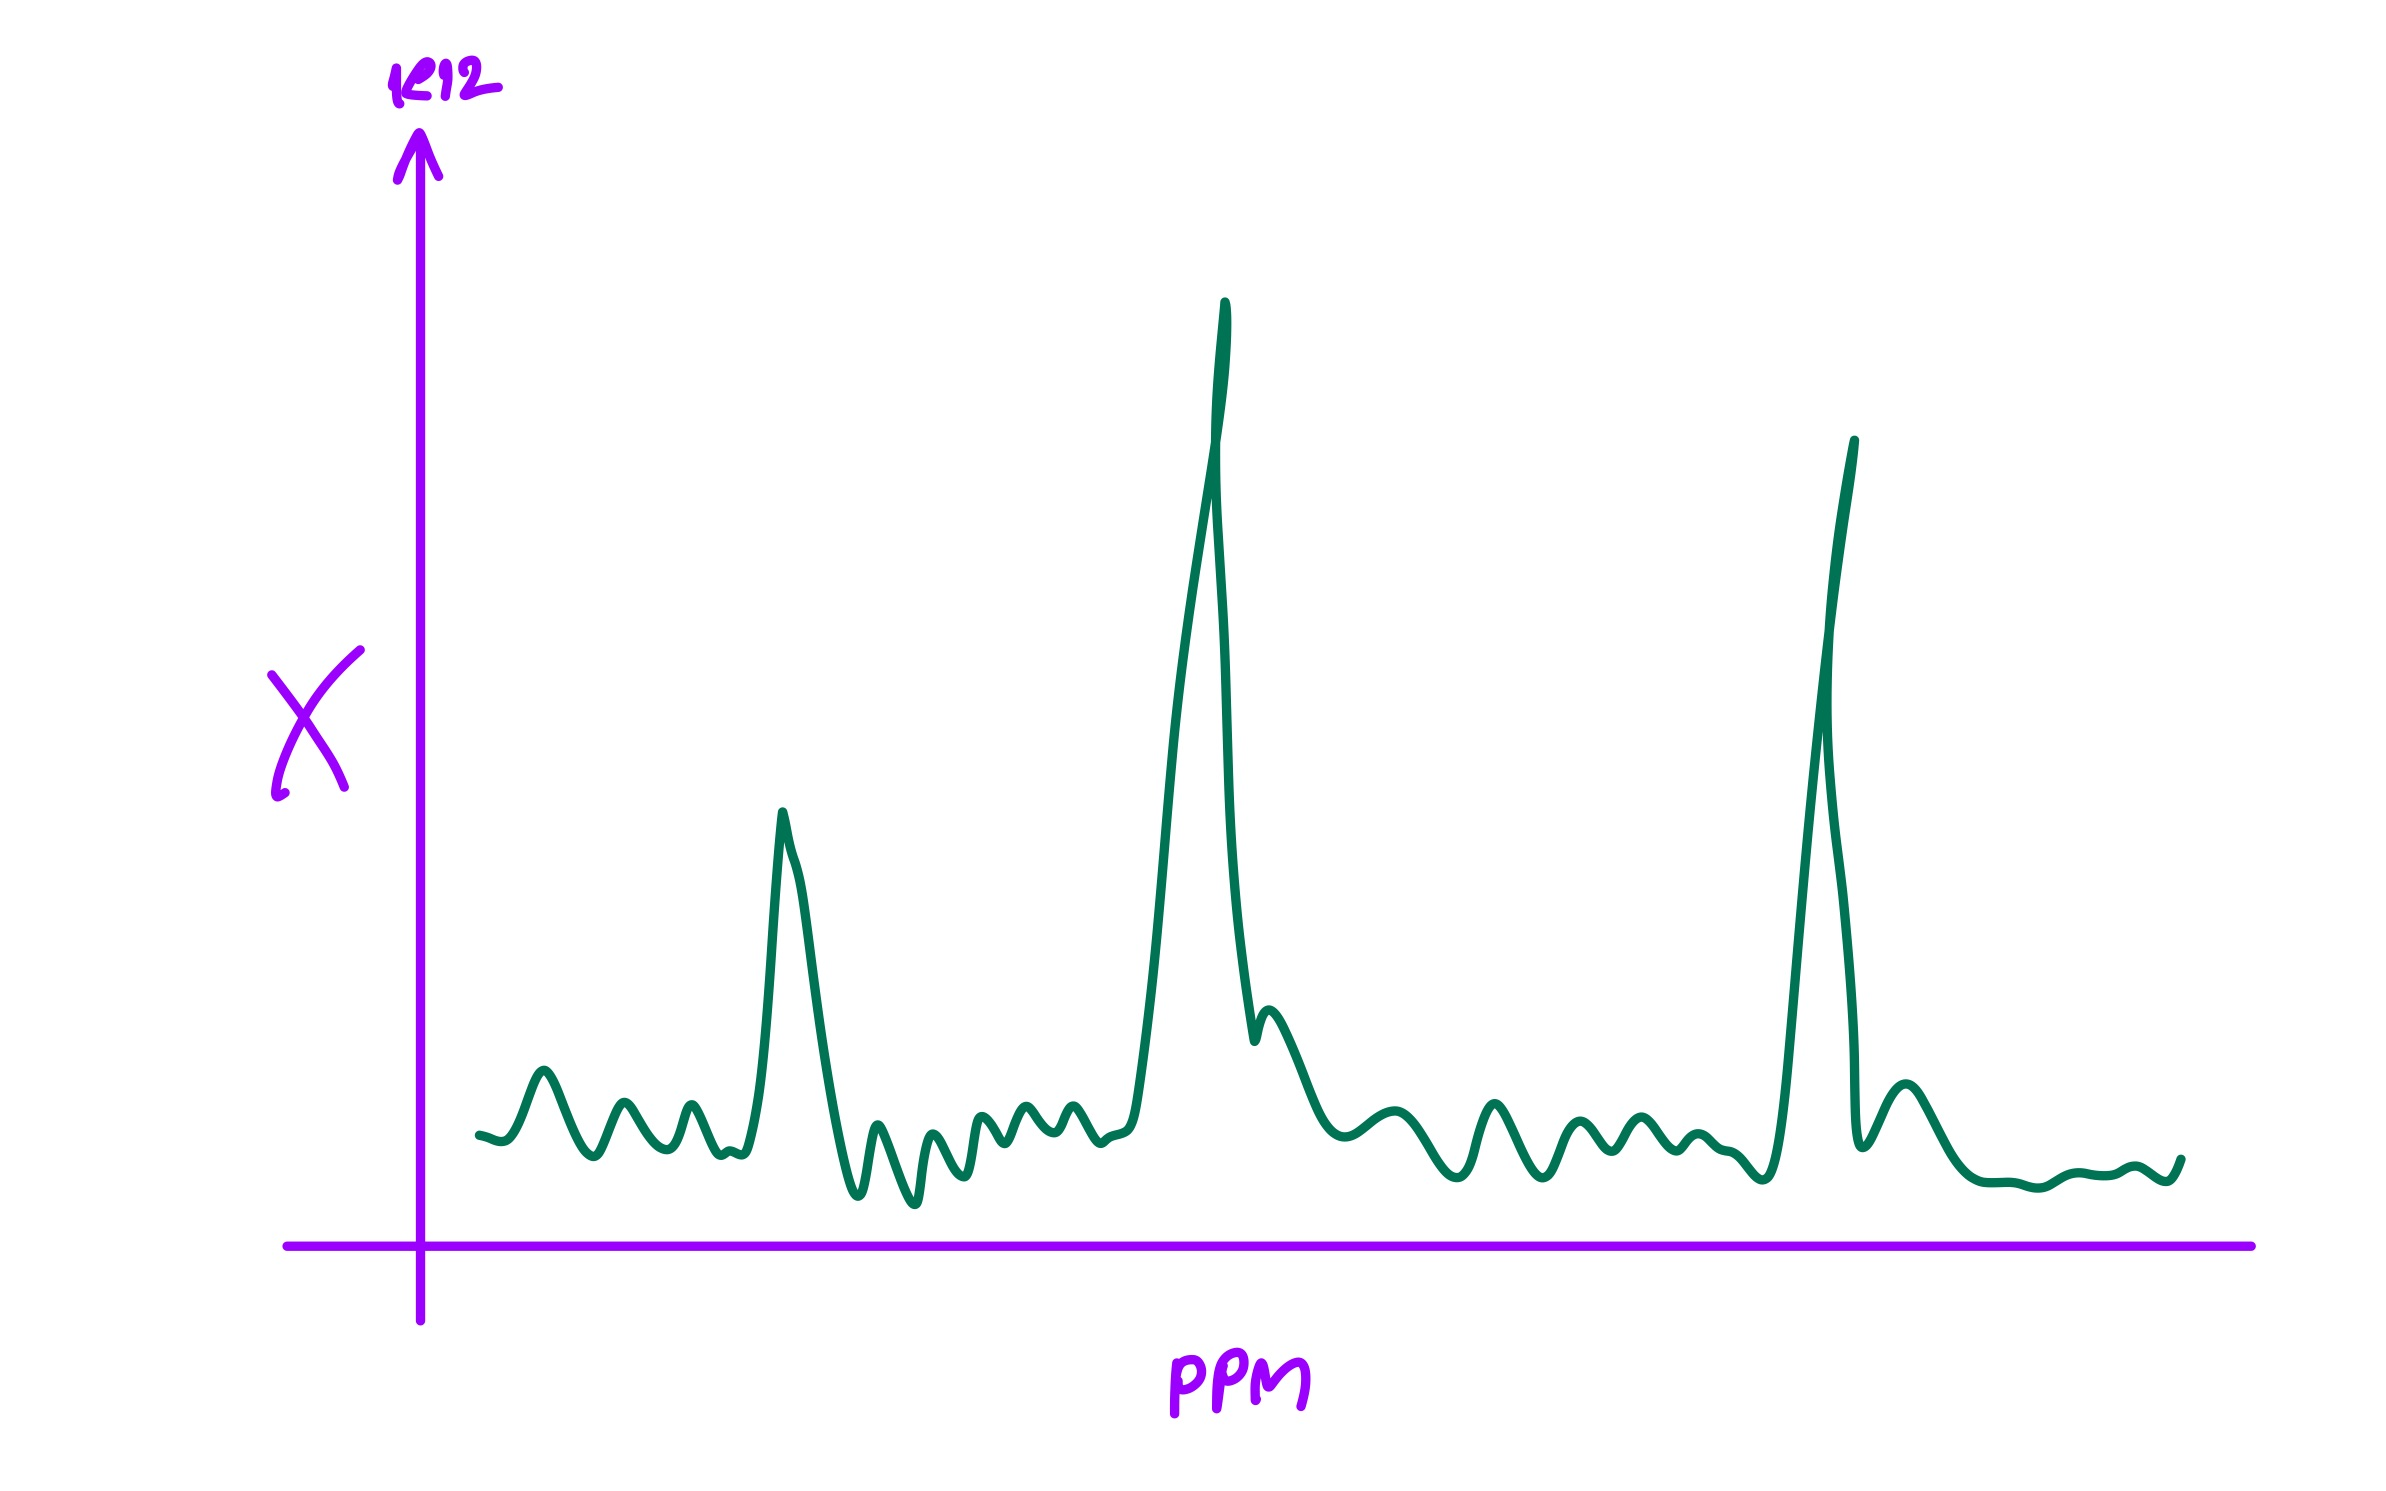

จัดการข้อมูลโดย 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm $\leq$ 0 และ ppm $\geq$ 9.5)
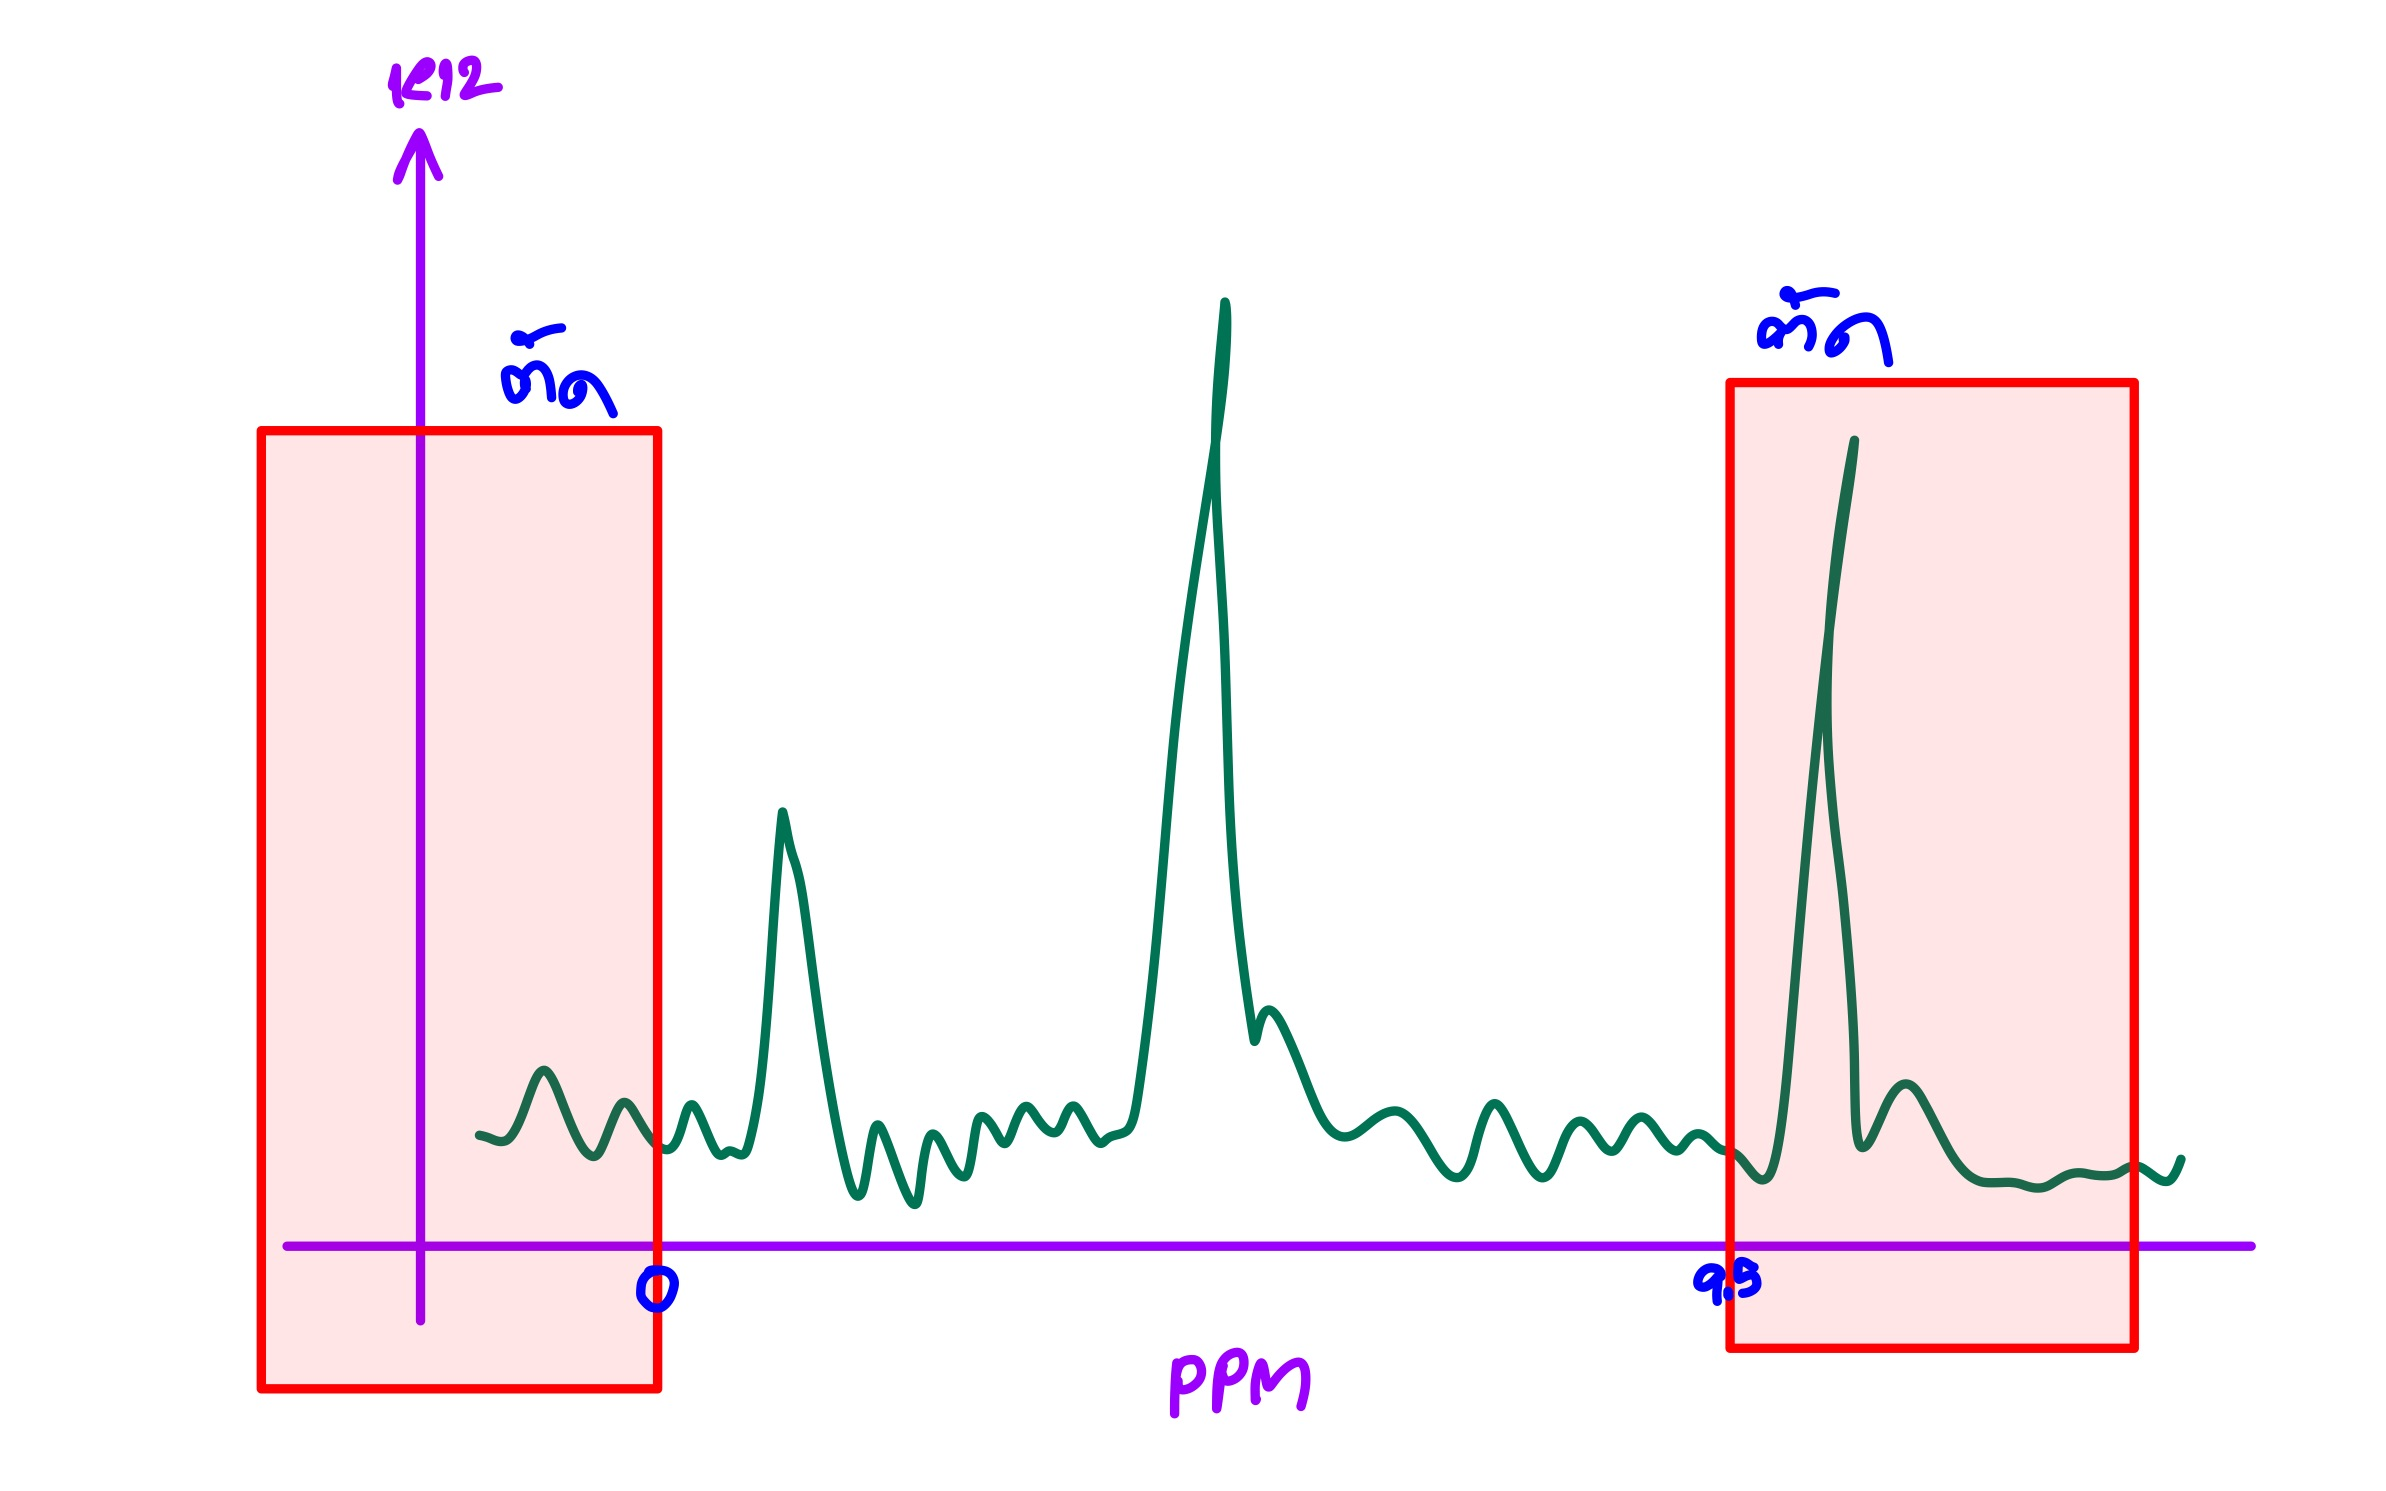

และ 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X
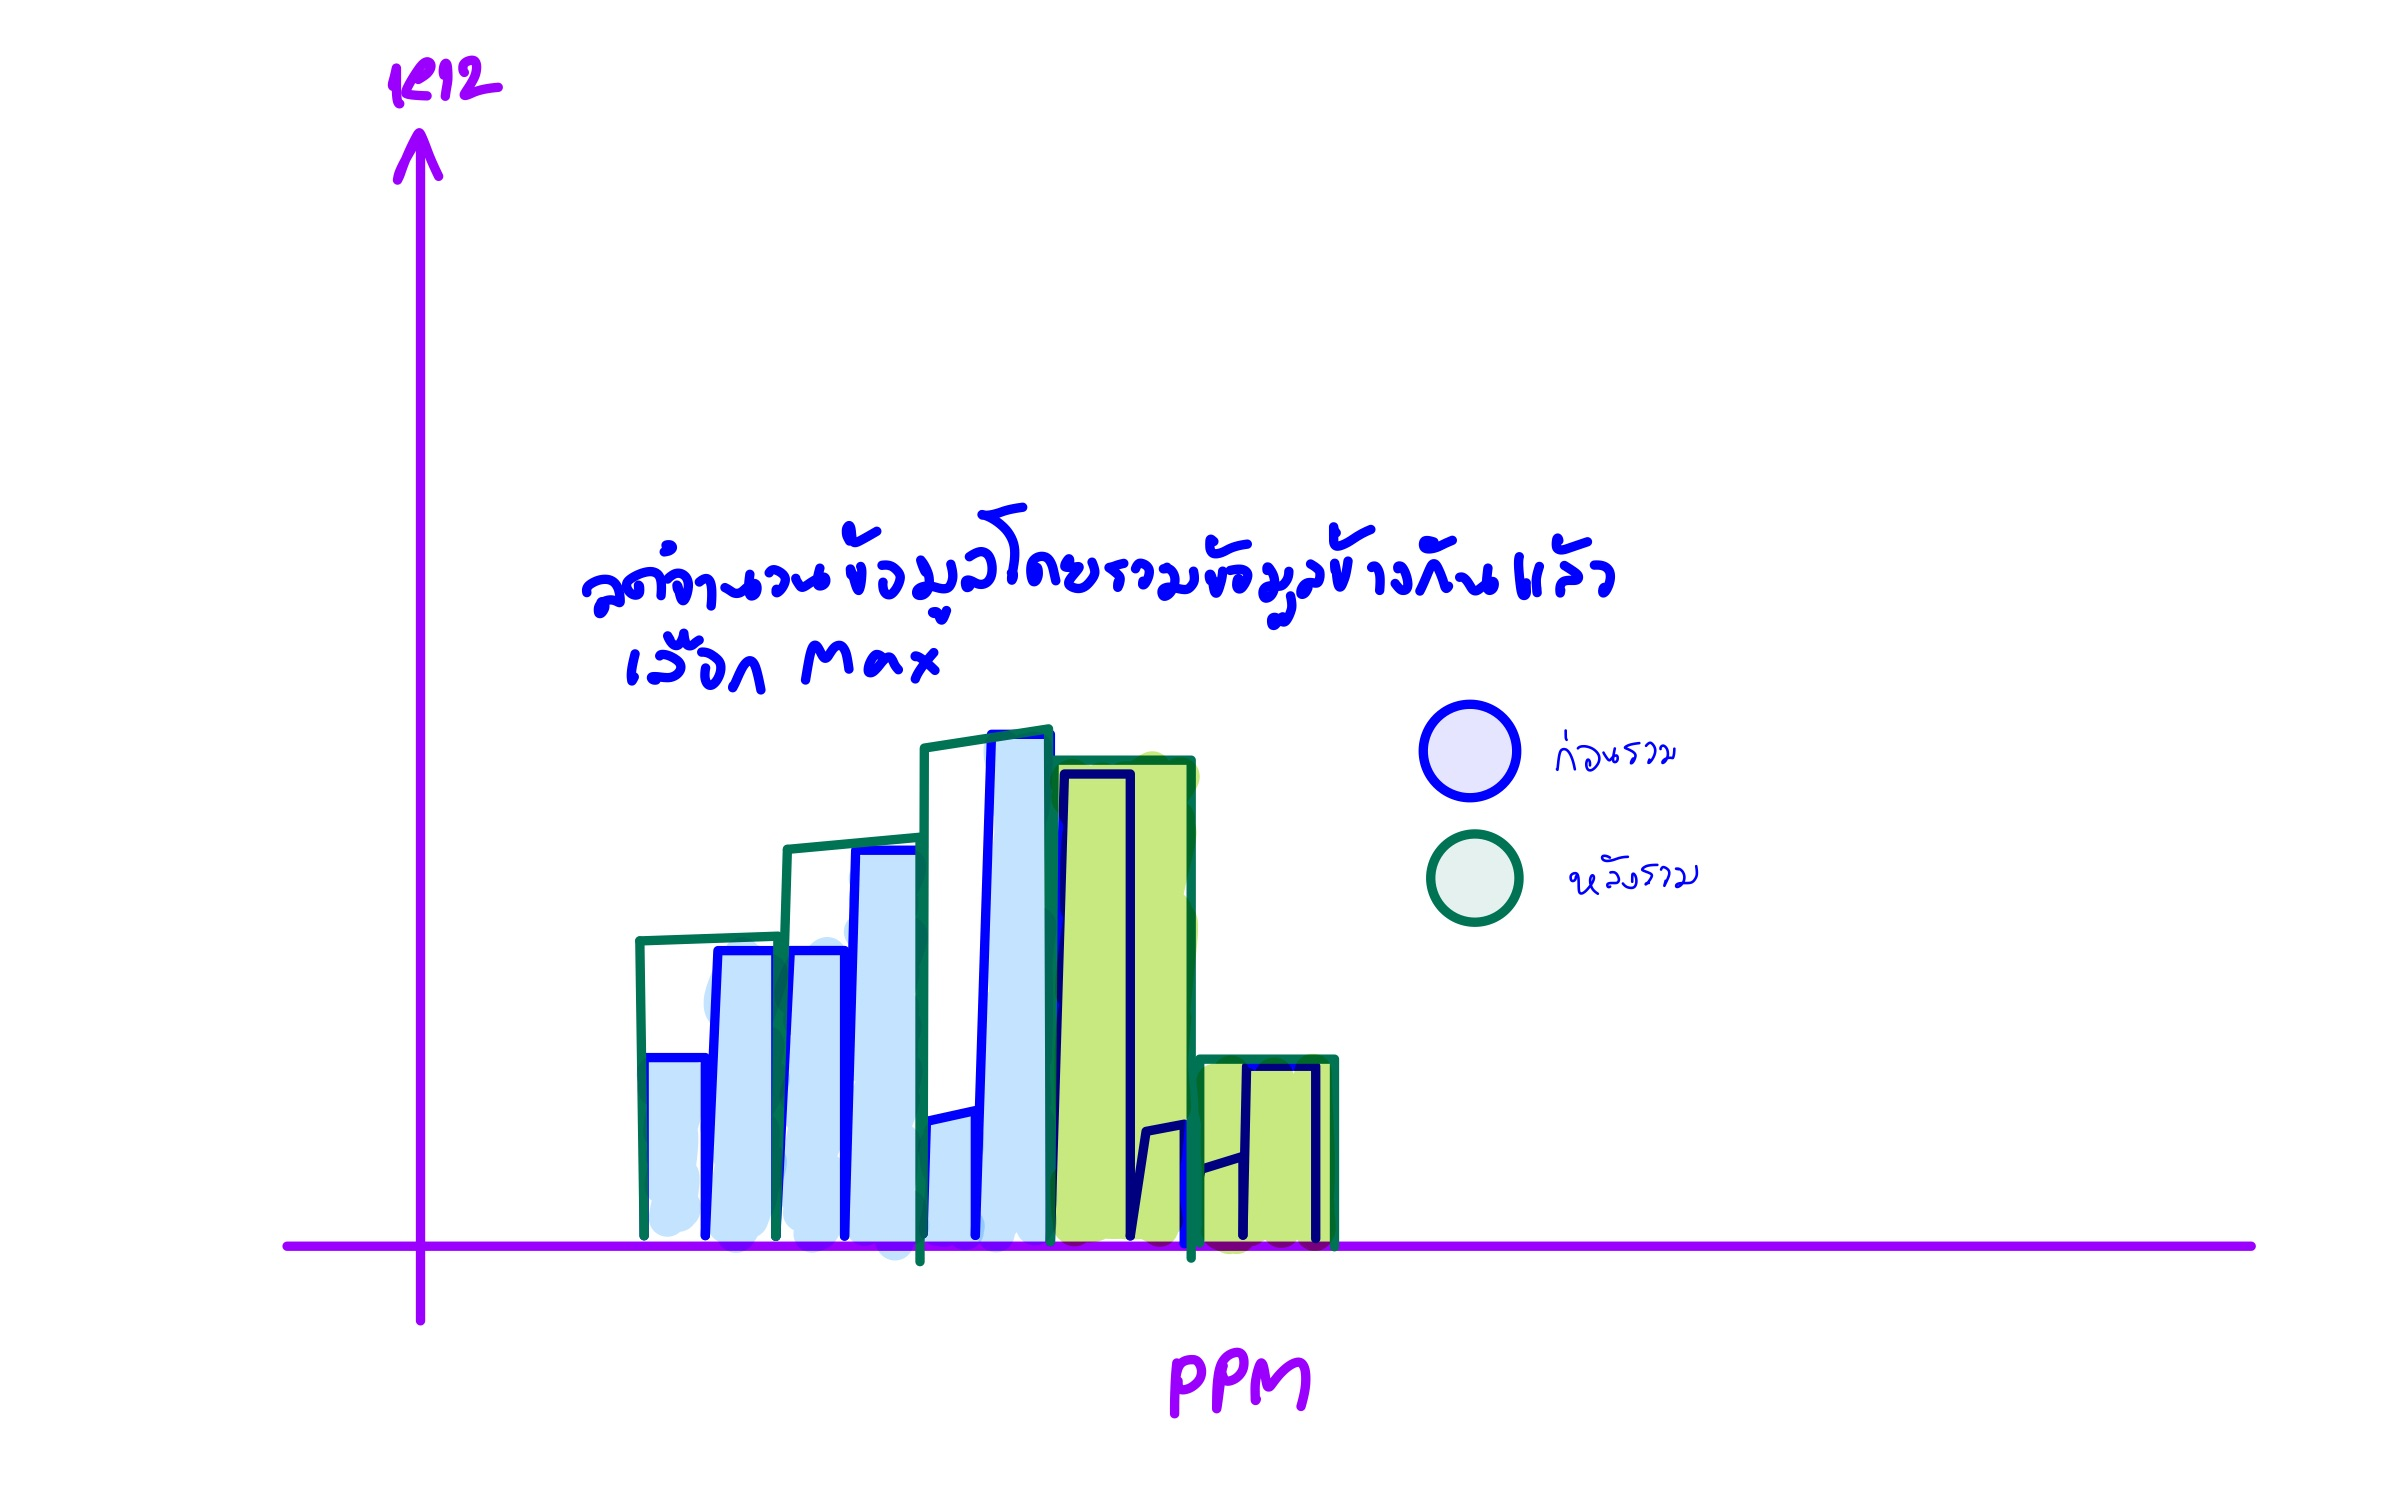

ข้อสอบ
0. preprocess ข้อมูลตามคำแนะนำข้างบน
1. ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้
2. visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
3. ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
4. สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

#Preprocess

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/My Drive/Data_viz_2024/Final/Xnn_ppm.pickle'

In [58]:
import pandas as pd
data = pd.read_pickle(path)
data

(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
          1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
        [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
          1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
        [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
         -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
        ...,
        [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
         -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
        [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
         -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
        [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
          1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]),
 array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
        -1.26045493, -1.26064005]))

In [67]:
X, ppm = data

df_x = pd.DataFrame(X)
df_ppm = pd.DataFrame(ppm)

In [ ]:
df_x

In [81]:
df_ppm = df_ppm.rename(columns={0: 'ppm'})

In [86]:
df_xt = df_x.transpose()
df_xt

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.369850e+07,8.556800e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.187129e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
1,1.369043e+07,7.907585e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.090589e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
2,1.278897e+07,7.289757e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.006625e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
3,1.240943e+07,6.754655e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.259570e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
4,1.330365e+07,6.380378e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.331593e+06,5.650688e+06,...,1.507131e+06,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,-8.236795e+04,1.365760e+06,-2.396153e+06,-8.486621e+05,-2.455801e+06,-3.464025e+06,-2.484356e+06,2.988137e+05,1.817856e+06,9.486354e+05,...,2.519066e+07,-3.956485e+06,2.253845e+07,-2.986107e+06,5.795916e+07,-1.219228e+07,1.448154e+07,-4.388387e+08,-5.024345e+06,1.216790e+07
65532,6.450271e+05,1.365760e+06,-2.112734e+06,-2.302021e+05,-2.038807e+06,-3.683338e+06,-2.276858e+06,-2.857978e+05,1.817856e+06,1.331776e+06,...,2.695422e+07,6.972294e+05,2.492892e+07,-5.537723e+06,5.992379e+07,-1.471175e+07,1.321234e+07,-4.371814e+08,-3.412381e+06,1.135021e+07
65533,1.886684e+06,1.365760e+06,-2.022003e+06,-1.990586e+05,-1.716671e+06,-3.914230e+06,-2.294027e+06,-1.104571e+06,1.817856e+06,8.992346e+05,...,2.364453e+07,2.482838e+06,2.277560e+07,-9.810074e+06,6.043890e+07,-1.370238e+07,1.207972e+07,-4.376135e+08,-4.623609e+05,1.161302e+07
65534,3.117794e+06,1.365760e+06,-2.322528e+06,-2.163733e+05,-1.660351e+06,-3.960924e+06,-2.309767e+06,-1.269575e+06,1.817856e+06,-1.209883e+05,...,1.619585e+07,3.693988e+06,1.643573e+07,-1.398409e+07,6.105497e+07,-8.574341e+06,1.245650e+07,-4.380953e+08,4.276339e+05,1.160734e+07


In [87]:
df_xt = pd.concat([df_xt, df_ppm], axis=1)
df_xt

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,ppm
0,1.369850e+07,8.556800e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.187129e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.871280
1,1.369043e+07,7.907585e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.090589e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.871095
2,1.278897e+07,7.289757e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.006625e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870910
3,1.240943e+07,6.754655e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.259570e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870725
4,1.330365e+07,6.380378e+06,4.740352e+06,7.544576e+06,1.145626e+07,8.285440e+06,8.642816e+06,1.061606e+07,7.331593e+06,5.650688e+06,...,1.065012e+07,1.587023e+06,-2.001424e+07,-3.112655e+06,2.679488e+06,2.872204e+06,3.863294e+07,9.941683e+05,-1.414911e+05,10.870540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,-8.236795e+04,1.365760e+06,-2.396153e+06,-8.486621e+05,-2.455801e+06,-3.464025e+06,-2.484356e+06,2.988137e+05,1.817856e+06,9.486354e+05,...,-3.956485e+06,2.253845e+07,-2.986107e+06,5.795916e+07,-1.219228e+07,1.448154e+07,-4.388387e+08,-5.024345e+06,1.216790e+07,-1.259900
65532,6.450271e+05,1.365760e+06,-2.112734e+06,-2.302021e+05,-2.038807e+06,-3.683338e+06,-2.276858e+06,-2.857978e+05,1.817856e+06,1.331776e+06,...,6.972294e+05,2.492892e+07,-5.537723e+06,5.992379e+07,-1.471175e+07,1.321234e+07,-4.371814e+08,-3.412381e+06,1.135021e+07,-1.260085
65533,1.886684e+06,1.365760e+06,-2.022003e+06,-1.990586e+05,-1.716671e+06,-3.914230e+06,-2.294027e+06,-1.104571e+06,1.817856e+06,8.992346e+05,...,2.482838e+06,2.277560e+07,-9.810074e+06,6.043890e+07,-1.370238e+07,1.207972e+07,-4.376135e+08,-4.623609e+05,1.161302e+07,-1.260270
65534,3.117794e+06,1.365760e+06,-2.322528e+06,-2.163733e+05,-1.660351e+06,-3.960924e+06,-2.309767e+06,-1.269575e+06,1.817856e+06,-1.209883e+05,...,3.693988e+06,1.643573e+07,-1.398409e+07,6.105497e+07,-8.574341e+06,1.245650e+07,-4.380953e+08,4.276339e+05,1.160734e+07,-1.260455


In [145]:
df_filtered = df_xt[df_xt['ppm'].between(0, 9.5)]
df_filtered

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,ppm
7408,-2.238253e+07,-1.588220e+07,-9.762433e+06,-1.152097e+07,-1.927329e+07,-1.988017e+07,-1.367572e+07,-1.549298e+07,-2.479188e+07,-1.193285e+07,...,-9.072824e+06,-2.718264e+07,8.450766e+06,6.824820e+06,-1.107763e+07,-8.461719e+06,-1.064183e+08,-9.067149e+06,1.785349e+07,9.499902
7409,-2.260135e+07,-1.570228e+07,-9.635796e+06,-1.159339e+07,-2.099650e+07,-1.992478e+07,-1.291794e+07,-1.545692e+07,-2.463914e+07,-1.274049e+07,...,-9.786775e+06,-2.377216e+07,8.419892e+06,5.540412e+06,-8.056375e+06,-5.620675e+06,-1.090064e+08,-8.372672e+06,1.142851e+07,9.499717
7410,-2.267760e+07,-1.537986e+07,-1.008305e+07,-1.195908e+07,-2.269406e+07,-1.942184e+07,-1.191170e+07,-1.631453e+07,-2.447632e+07,-1.408447e+07,...,-6.984165e+06,-1.382388e+07,7.703981e+06,3.399197e+06,-6.651519e+06,-4.781567e+06,-1.089453e+08,-3.065423e+06,3.830300e+06,9.499532
7411,-2.349828e+07,-1.482737e+07,-1.057019e+07,-1.241262e+07,-2.366070e+07,-1.882713e+07,-1.118082e+07,-1.752630e+07,-2.415622e+07,-1.553678e+07,...,-4.600821e+06,-1.323977e+06,5.463550e+06,1.869006e+06,-9.333215e+06,-5.963118e+06,-1.049720e+08,4.018505e+06,-4.757110e+05,9.499347
7412,-2.480870e+07,-1.378149e+07,-1.146064e+07,-1.312839e+07,-2.397809e+07,-1.801209e+07,-1.055638e+07,-1.781588e+07,-2.365328e+07,-1.638217e+07,...,-6.472428e+06,8.276753e+06,4.004620e+06,4.673788e+05,-1.481505e+07,-9.253534e+06,-9.742646e+07,7.447501e+06,-4.326780e+06,9.499161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58721,1.128203e+11,9.069517e+10,7.434140e+10,6.968615e+10,9.756285e+10,7.944997e+10,7.618053e+10,1.154259e+11,1.075667e+11,1.114016e+11,...,2.409831e+09,4.485844e+09,1.076543e+10,2.065825e+10,1.487293e+09,7.341998e+08,1.895269e+10,9.837356e+08,1.324350e+10,0.000776
58722,1.190349e+11,9.436802e+10,7.688202e+10,7.123941e+10,1.017397e+11,8.123742e+10,7.808825e+10,1.198016e+11,1.127957e+11,1.164055e+11,...,2.352254e+09,4.345594e+09,1.027581e+10,1.876368e+10,1.439568e+09,7.106767e+08,1.776680e+10,9.568173e+08,1.247164e+10,0.000591
58723,1.239041e+11,9.723589e+10,7.892382e+10,7.242124e+10,1.049403e+11,8.259823e+10,7.952851e+10,1.232555e+11,1.168865e+11,1.202236e+11,...,2.297337e+09,4.211624e+09,9.817499e+09,1.710433e+10,1.391813e+09,6.893628e+08,1.672004e+10,9.340124e+08,1.177697e+10,0.000406
58724,1.270392e+11,9.914259e+10,8.037480e+10,7.319850e+10,1.069632e+11,8.348879e+10,8.047114e+10,1.256714e+11,1.195929e+11,1.227010e+11,...,2.245036e+09,4.081732e+09,9.391262e+09,1.566929e+10,1.345245e+09,6.709736e+08,1.579794e+10,9.137152e+08,1.114885e+10,0.000221


In [148]:
from sklearn.cluster import KMeans

ppm_data = df_filtered['ppm']

kmeans = KMeans(n_clusters=400, random_state=0)

kmeans.fit(ppm_data.values.reshape(-1, 1))

labels = kmeans.labels_

quantized_data = df_filtered.groupby(labels).agg('mean')
quantized_data

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,ppm
0,3.501136e+08,3.160441e+08,9.508444e+07,8.791468e+07,2.960157e+08,3.242082e+08,1.037264e+08,1.985648e+08,3.516209e+08,2.324379e+08,...,1.114889e+09,6.123019e+08,1.433679e+09,4.919013e+09,2.209692e+09,1.441536e+09,2.690442e+09,9.503469e+08,1.274575e+09,4.280686
1,-2.300018e+07,-1.971255e+07,-1.273713e+07,-1.309124e+07,-2.599203e+07,-2.372806e+07,-1.326225e+07,-1.593041e+07,-2.483410e+07,-1.645949e+07,...,3.334133e+07,3.529349e+07,1.143495e+08,6.785688e+07,7.355021e+07,5.264459e+07,-1.653485e+08,7.036706e+07,8.635112e+07,7.848065
2,1.307990e+08,1.243850e+08,4.757256e+07,4.717058e+07,1.357656e+08,8.673008e+07,4.791468e+07,1.150627e+08,1.384052e+08,1.182604e+08,...,5.321207e+08,5.697937e+08,1.072543e+09,1.642180e+09,9.142773e+08,8.133590e+08,3.107135e+08,6.071664e+08,8.117859e+08,1.551444
3,-2.041139e+07,-1.807865e+07,-1.269520e+07,-1.370792e+07,-2.428741e+07,-1.865816e+07,-1.289443e+07,-1.761454e+07,-2.309057e+07,-1.644698e+07,...,-8.583887e+06,2.345086e+06,2.718097e+06,-1.569496e+07,-1.097980e+07,-6.411237e+06,-1.066270e+08,5.615054e+06,1.788698e+06,9.175384
4,6.903198e+08,6.837264e+08,1.714937e+08,1.709967e+08,5.438283e+08,6.882627e+08,1.840199e+08,4.308782e+08,8.110218e+08,4.917717e+08,...,1.927338e+08,2.317338e+08,1.303387e+09,3.786705e+09,5.970938e+08,3.572007e+08,2.169391e+09,1.835774e+08,8.058163e+08,6.516766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.925024e+10,1.869414e+10,4.317527e+09,4.574672e+09,5.104376e+09,1.351636e+10,4.636981e+09,7.237768e+09,2.202240e+10,1.639800e+10,...,1.100178e+10,4.644040e+09,6.211325e+09,1.114993e+10,7.299891e+09,6.911572e+09,8.204449e+09,4.867100e+09,5.103441e+09,3.615916
396,1.436059e+08,7.685029e+07,1.129315e+08,1.105370e+08,6.774836e+07,8.768676e+07,1.150708e+08,6.977681e+07,4.606775e+08,6.518711e+07,...,9.775226e+07,1.466344e+08,4.746936e+08,6.090685e+08,2.091891e+08,1.423962e+08,2.105136e+08,1.601675e+08,2.843432e+08,7.313435
397,3.823863e+07,5.297087e+07,6.812007e+06,4.106098e+06,2.174016e+07,4.294322e+07,7.615164e+06,2.535356e+07,5.564357e+07,3.423308e+07,...,5.768955e+07,8.675796e+07,2.491688e+08,5.179903e+08,1.344458e+08,1.145699e+08,3.183978e+07,1.082292e+08,2.744946e+08,5.616244
398,2.583686e+08,2.875875e+08,1.449510e+08,1.424275e+08,2.280279e+08,3.371963e+08,1.532407e+08,3.715139e+08,3.838352e+08,2.179345e+08,...,5.930376e+08,4.963129e+08,7.903687e+08,1.577642e+09,9.514540e+08,7.318884e+08,2.532890e+08,6.494508e+08,5.424237e+08,4.398609


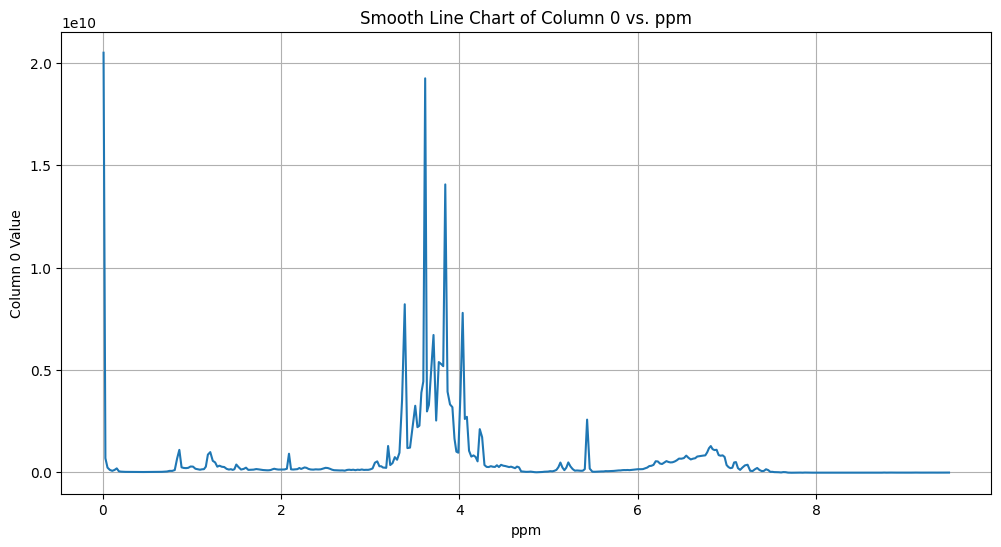

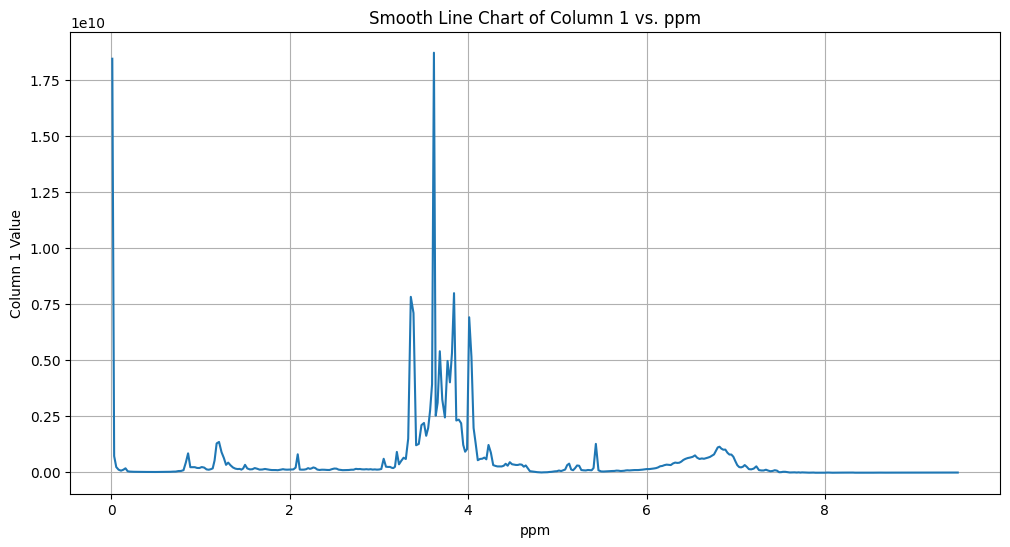

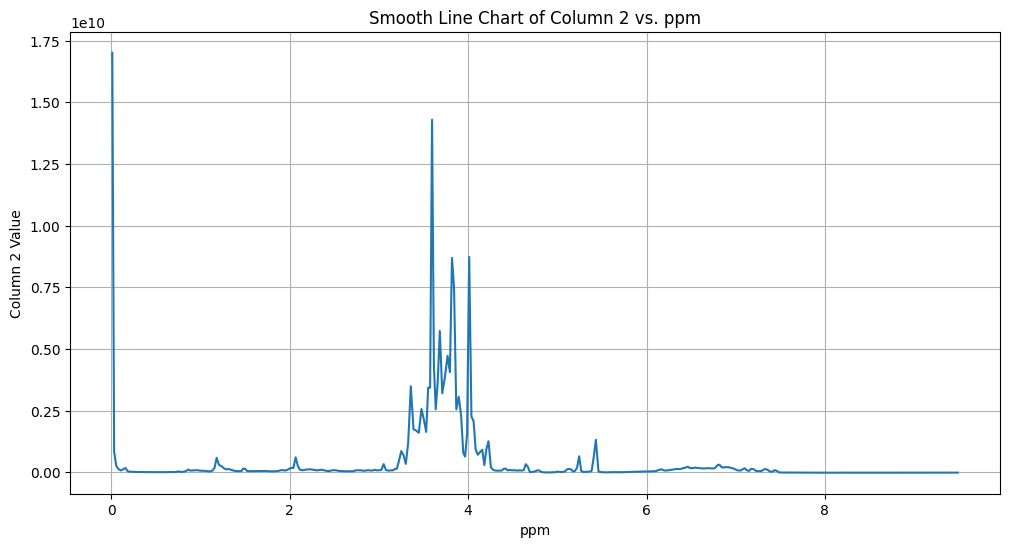

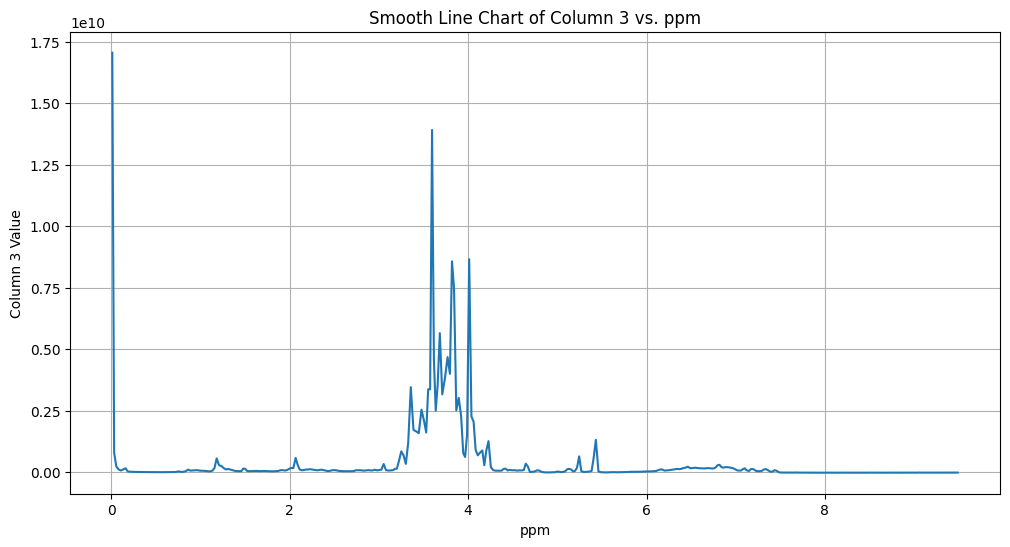

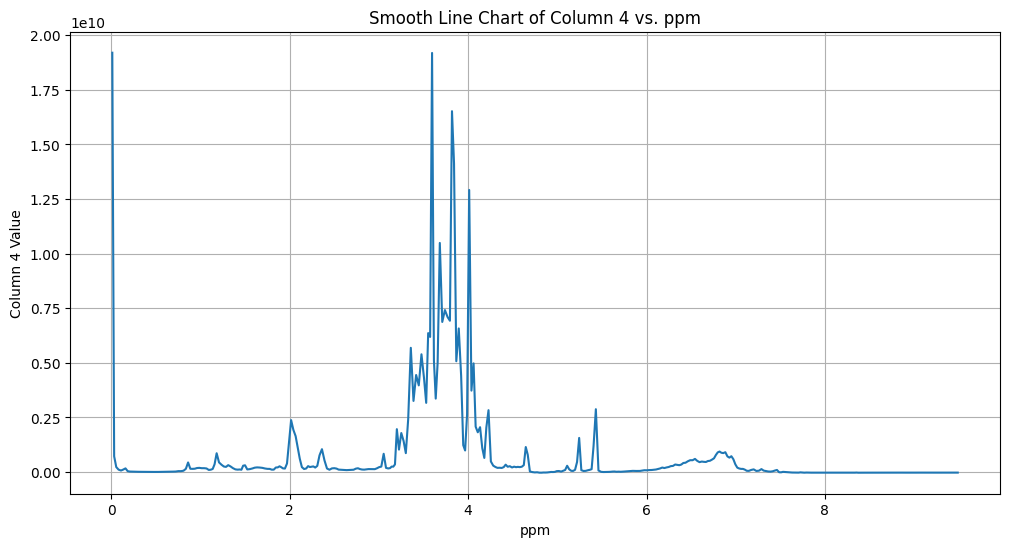

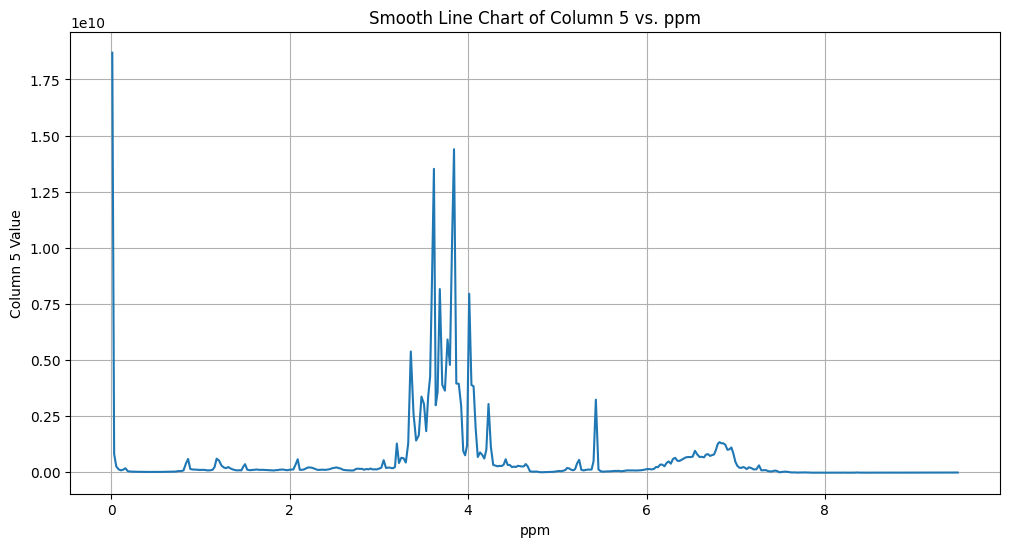

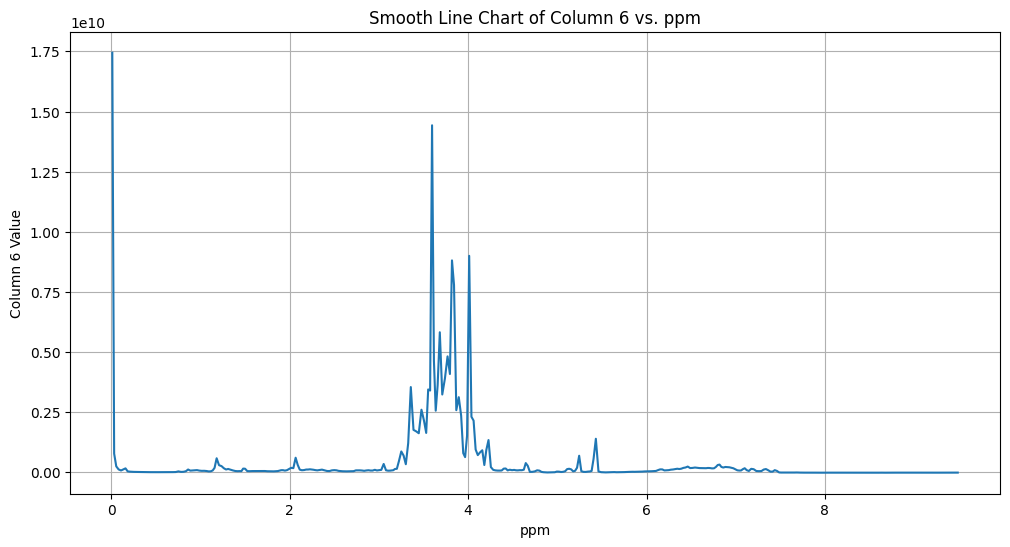

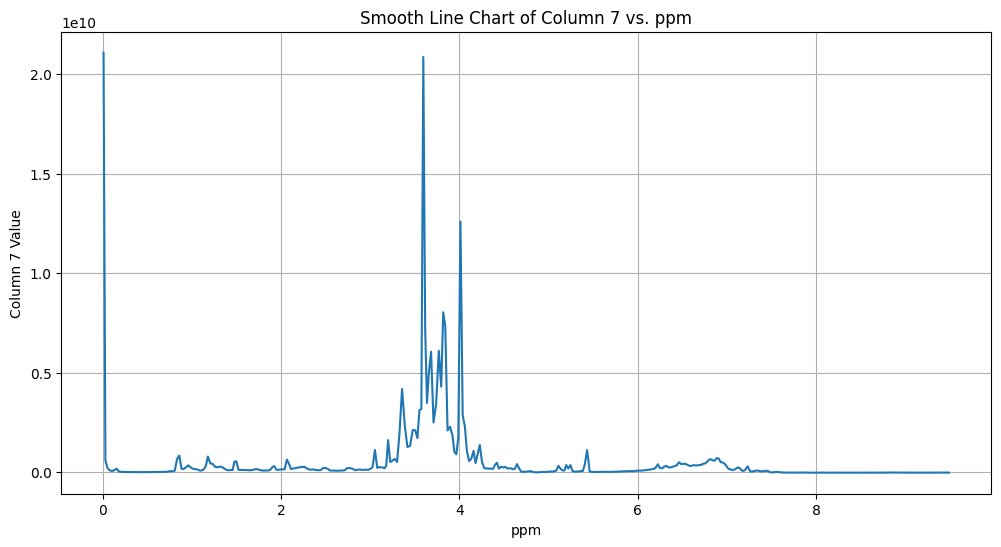

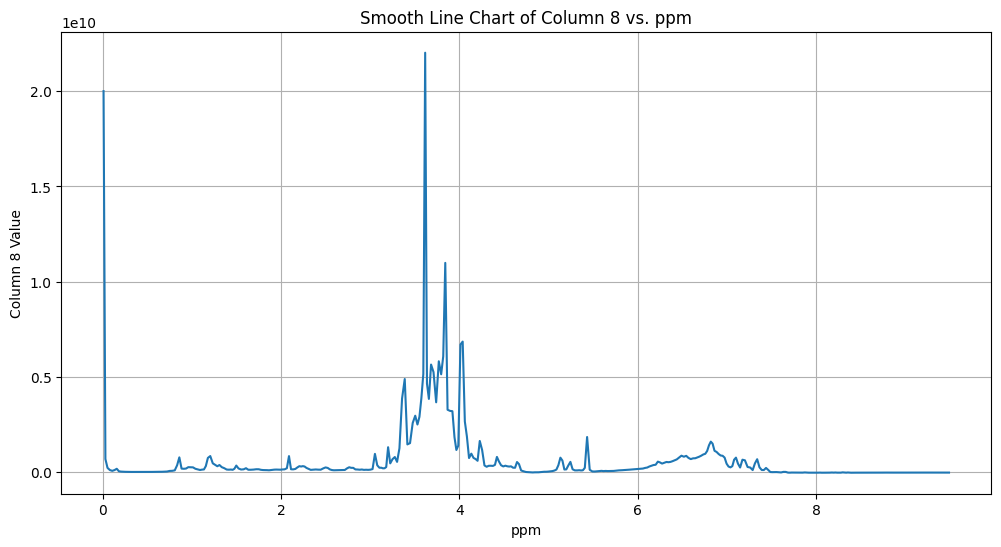

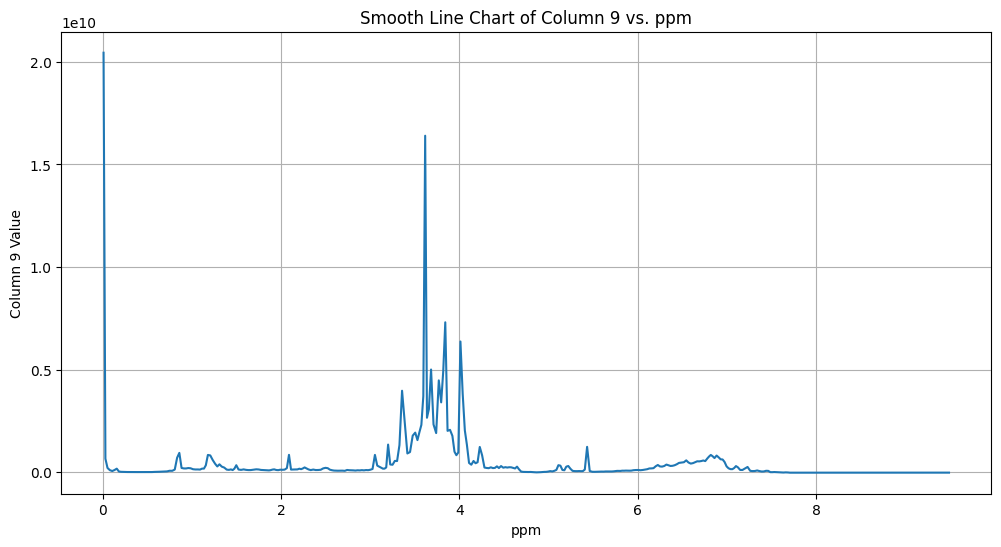

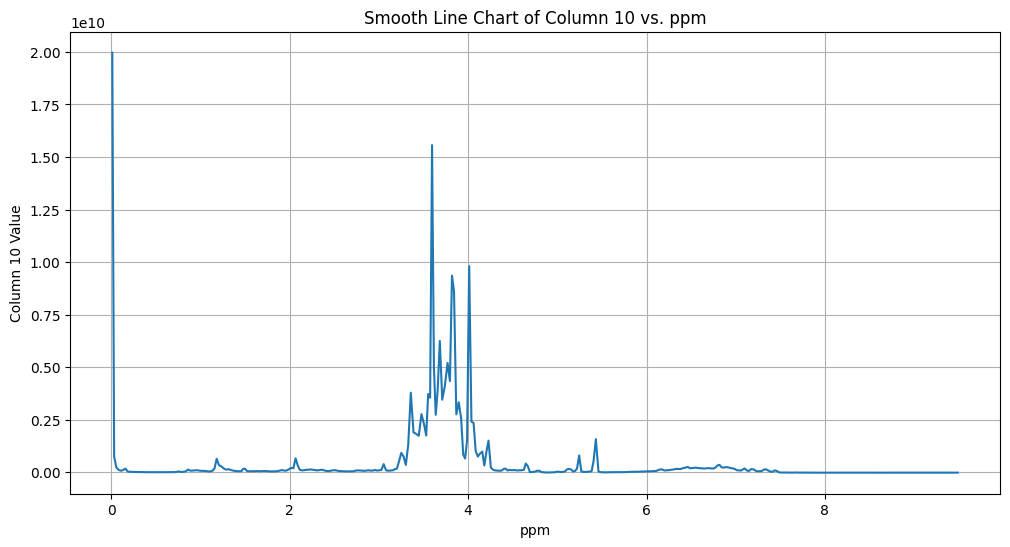

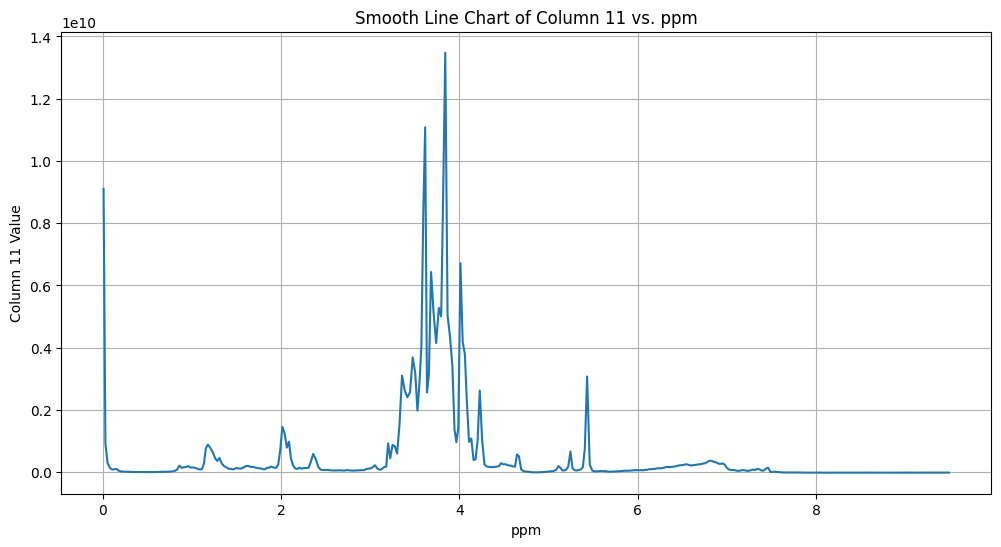

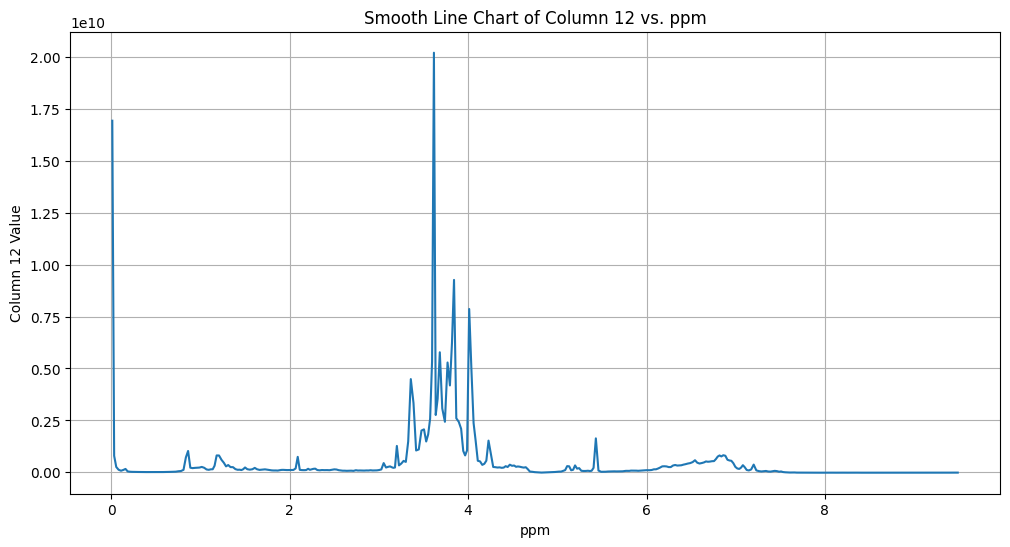

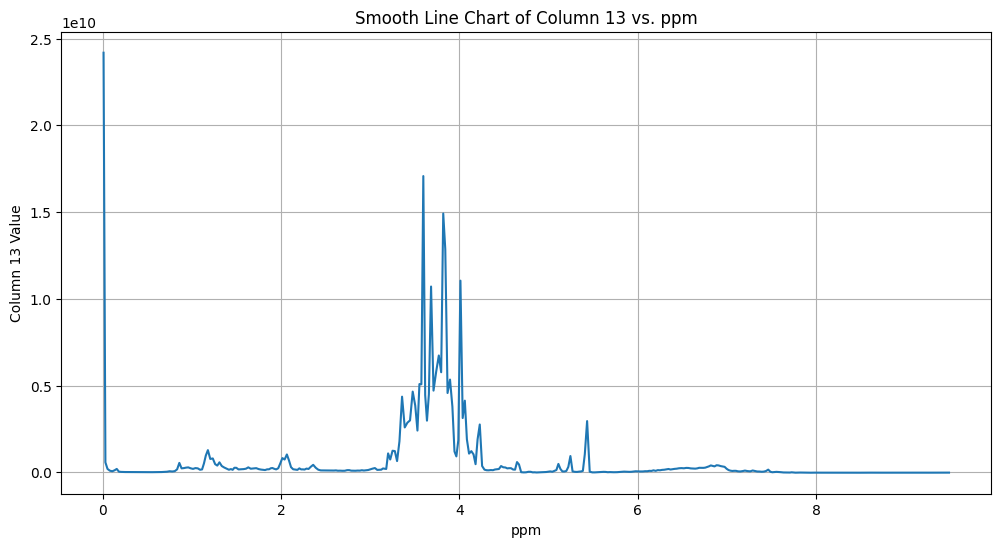

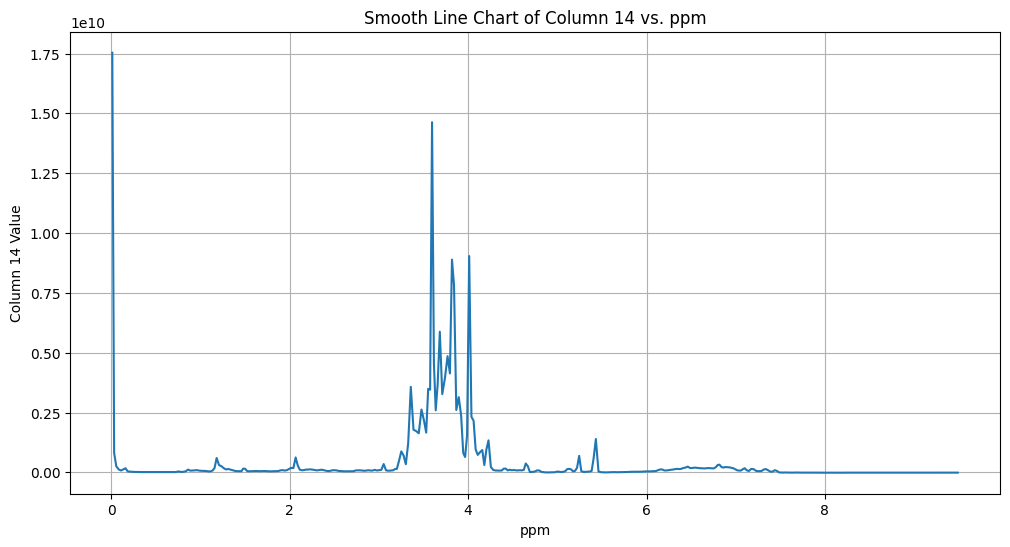

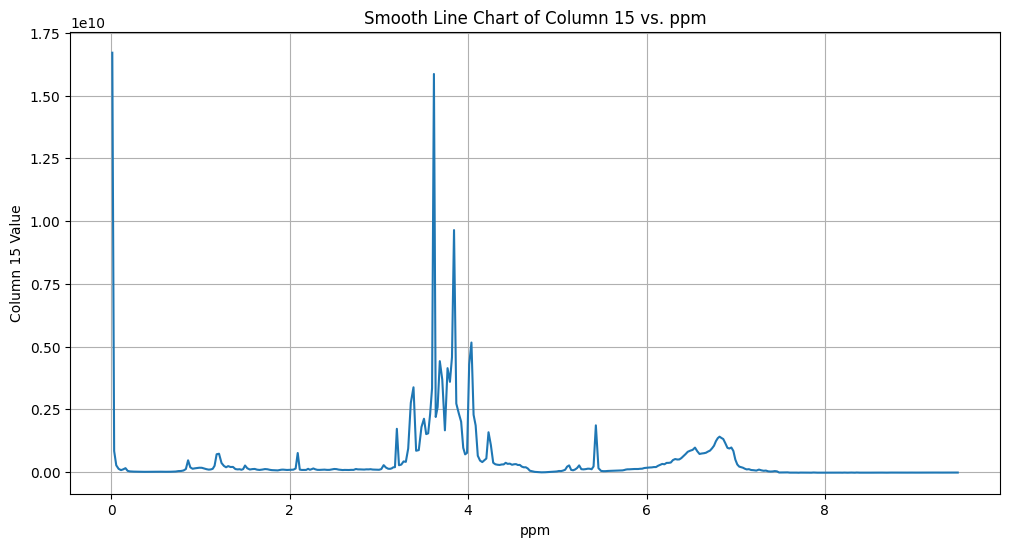

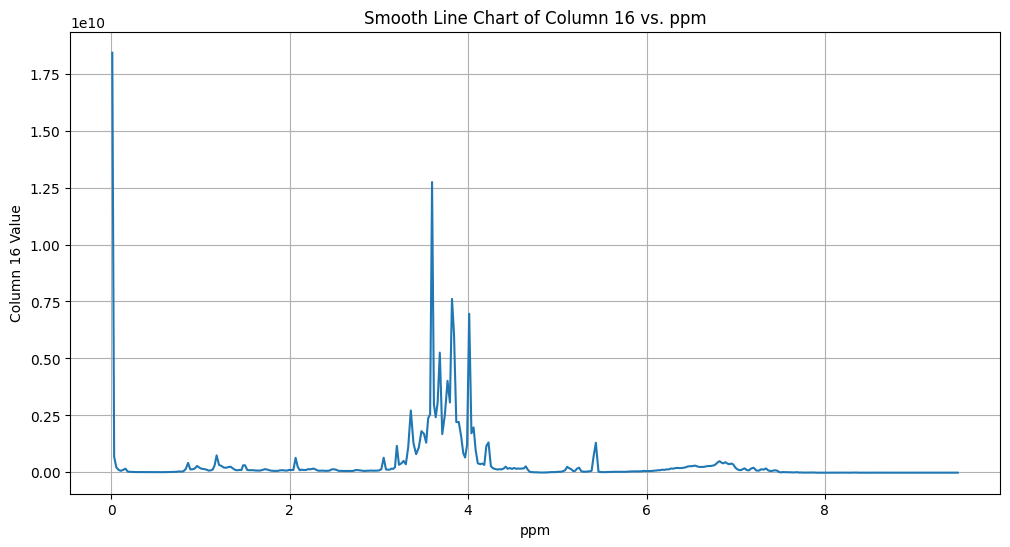

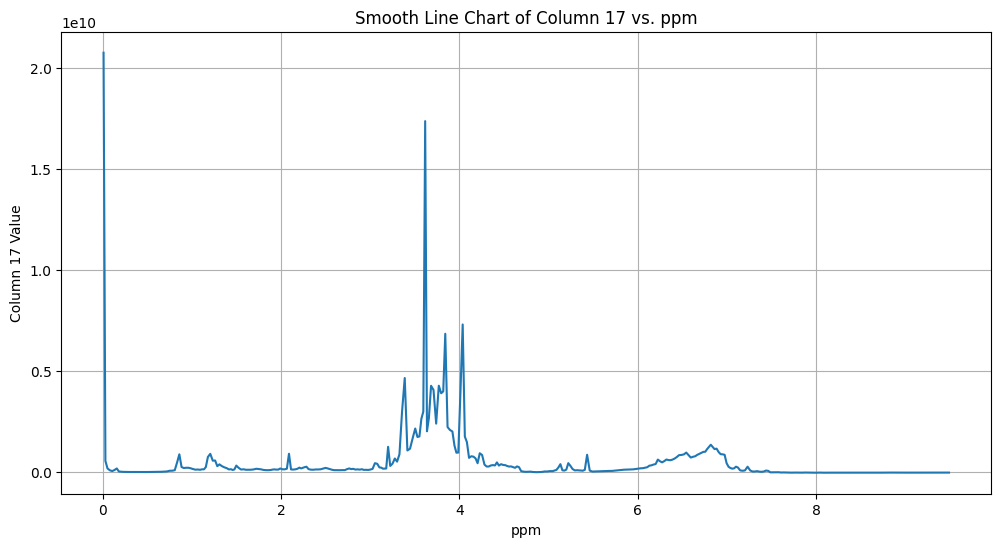

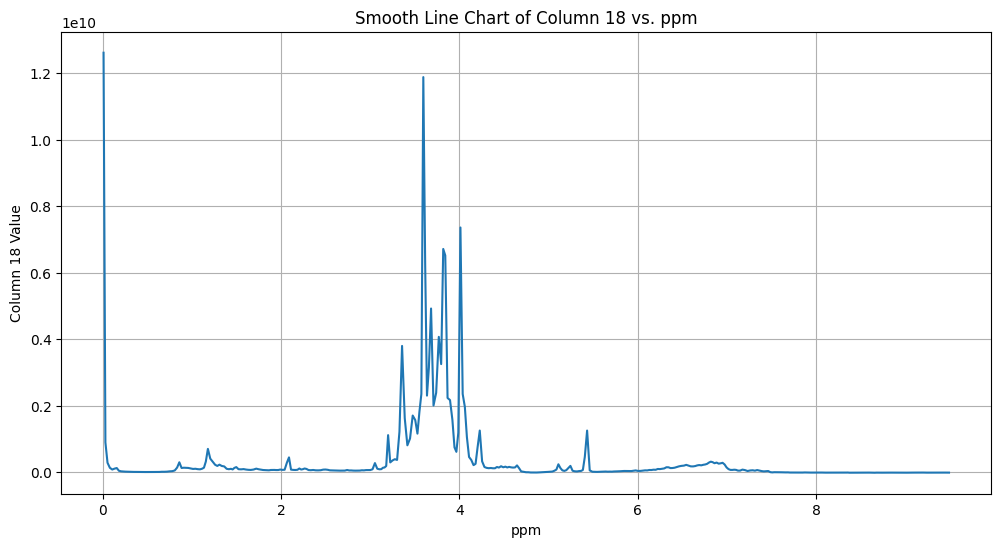

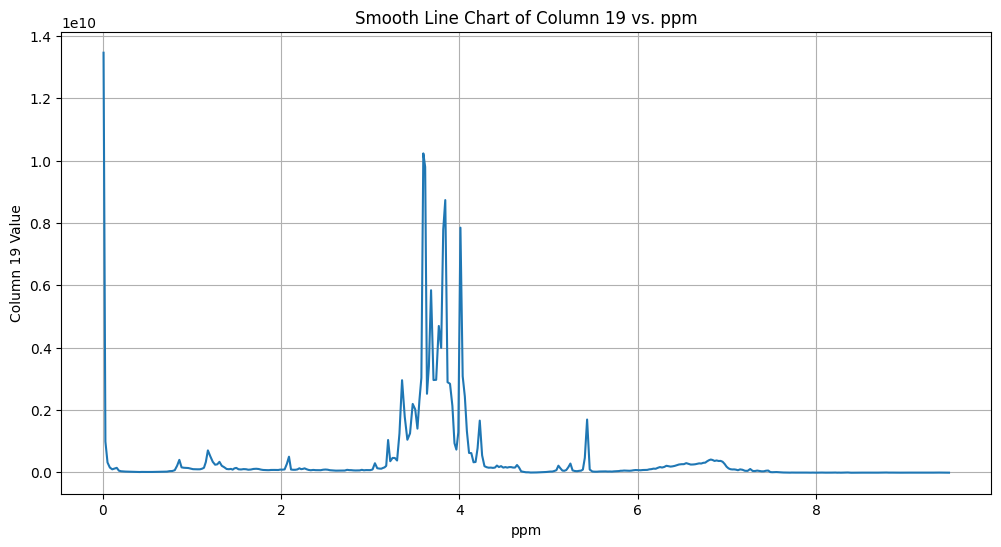

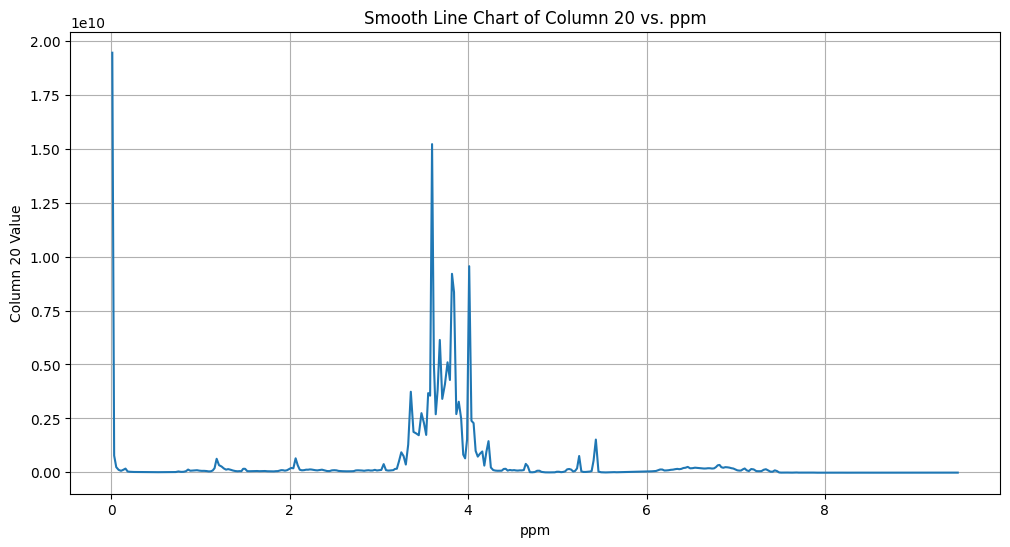

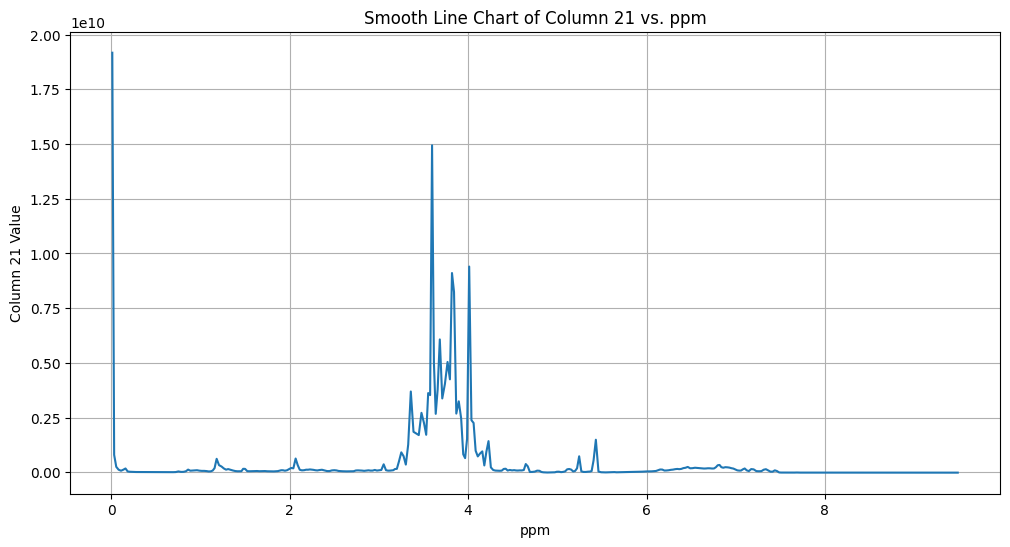

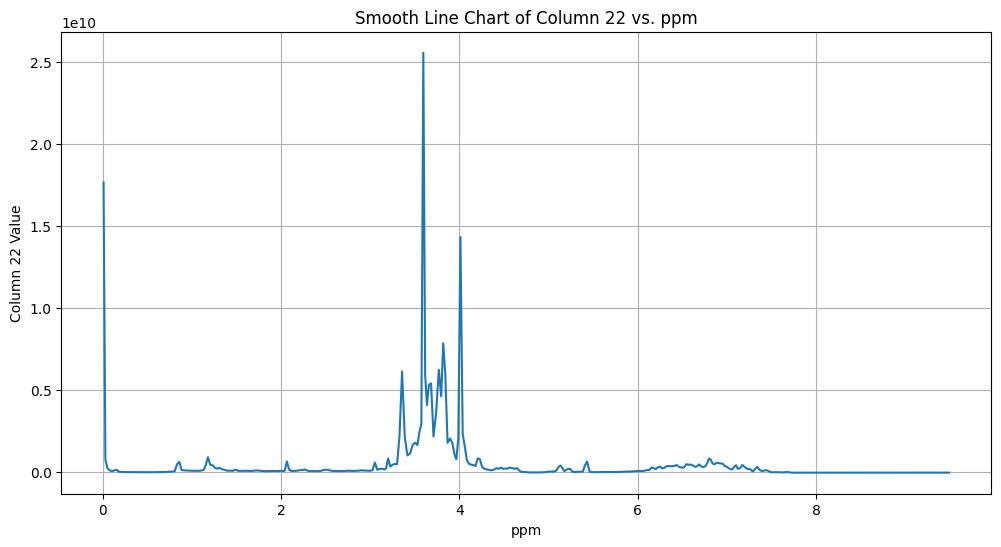

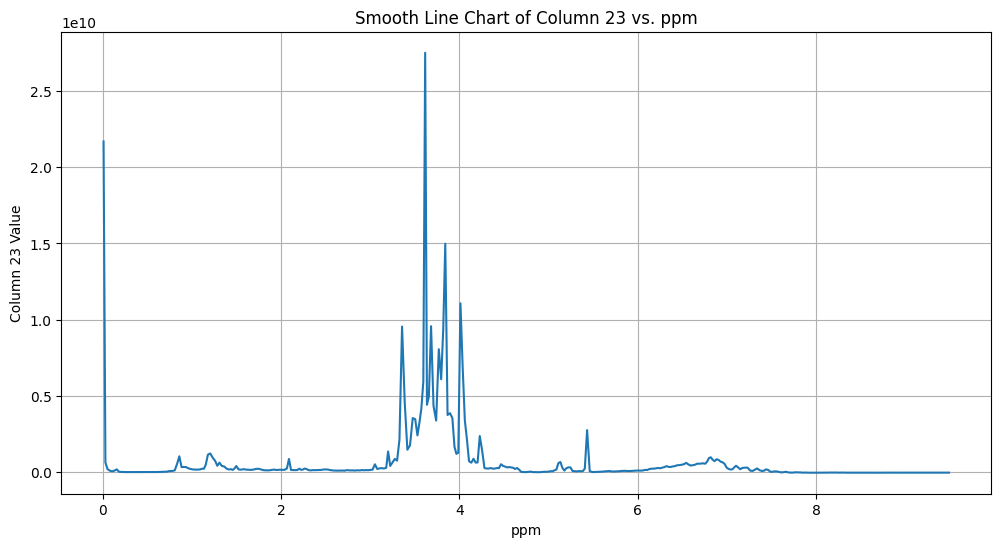

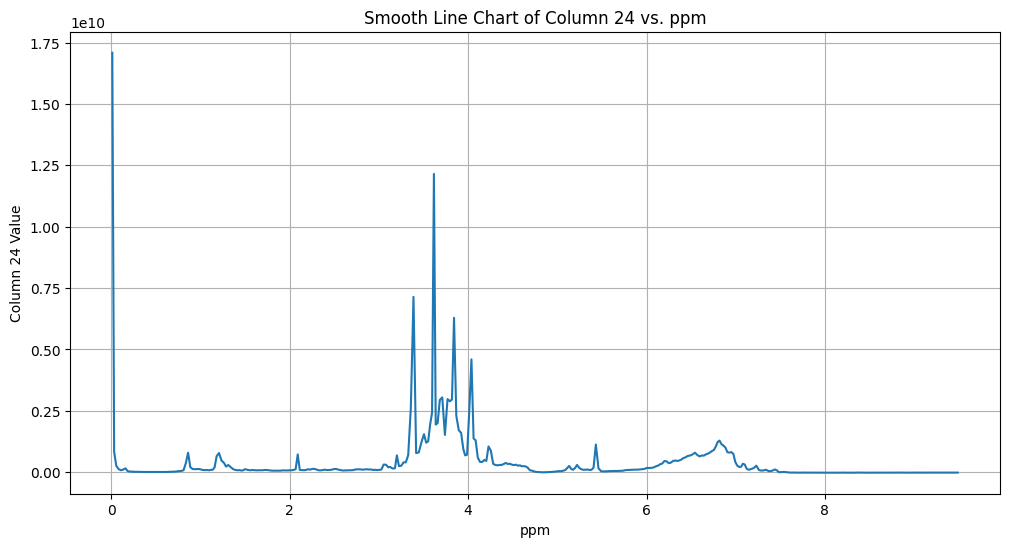

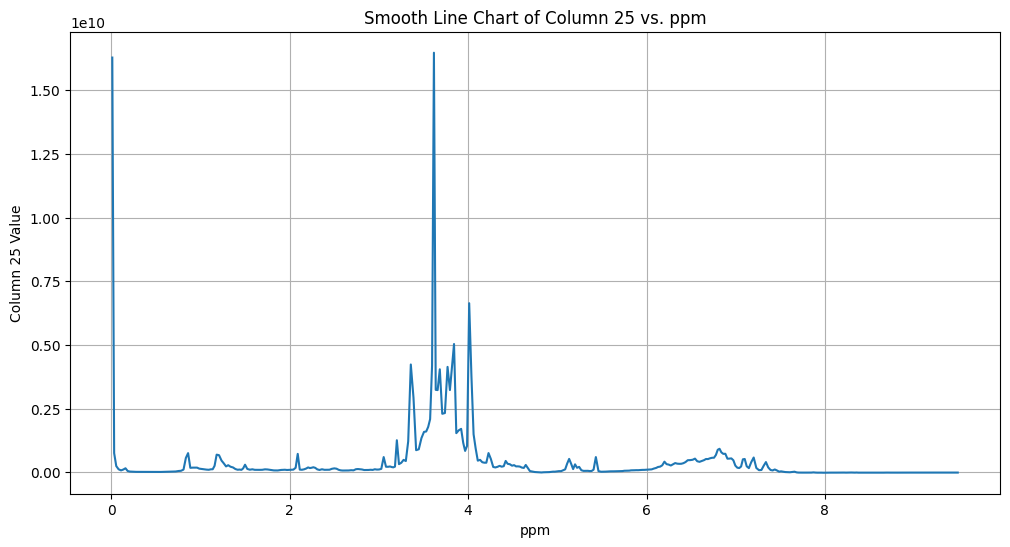

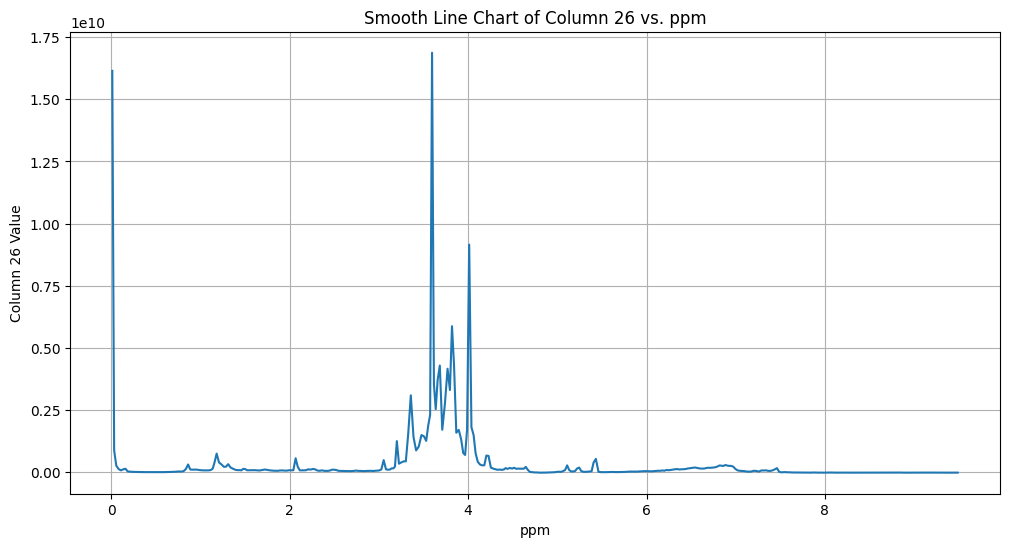

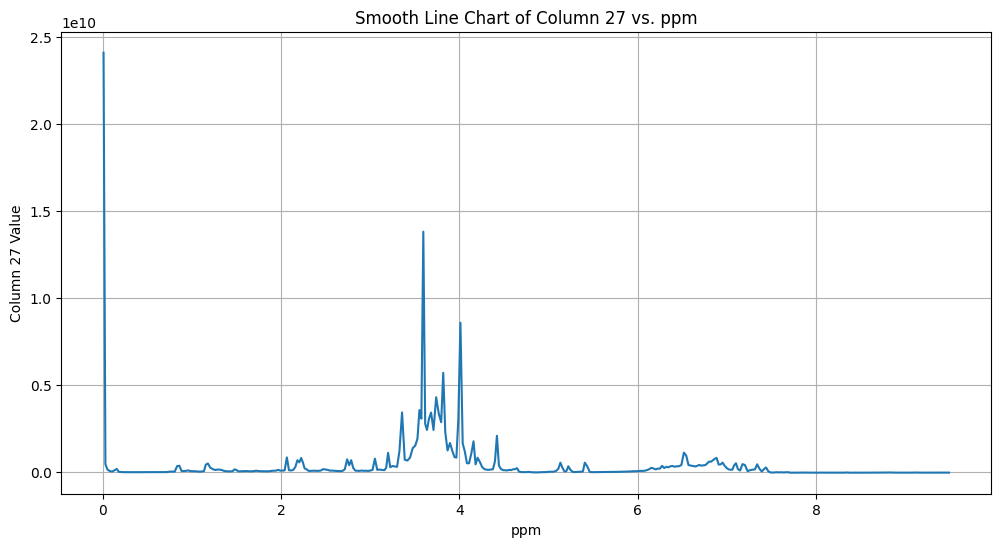

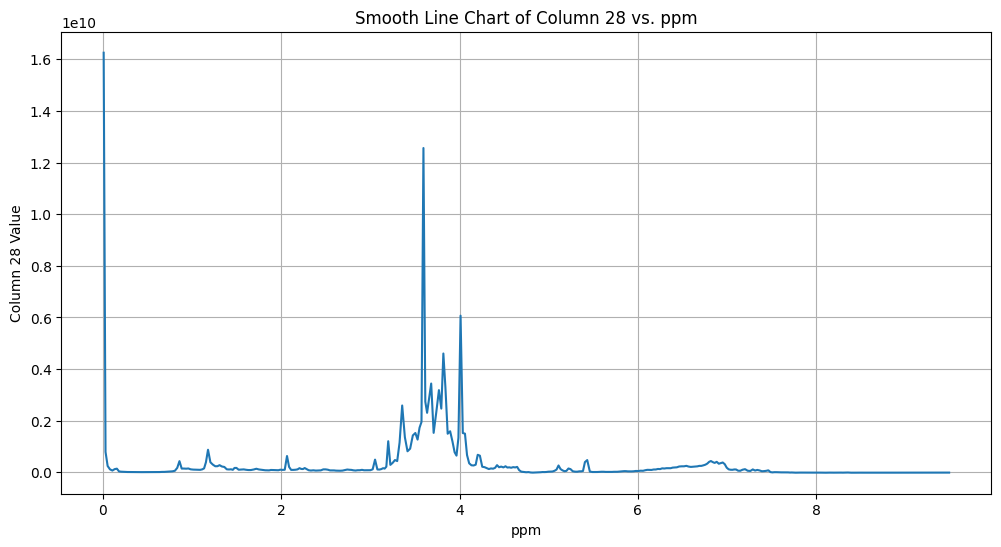

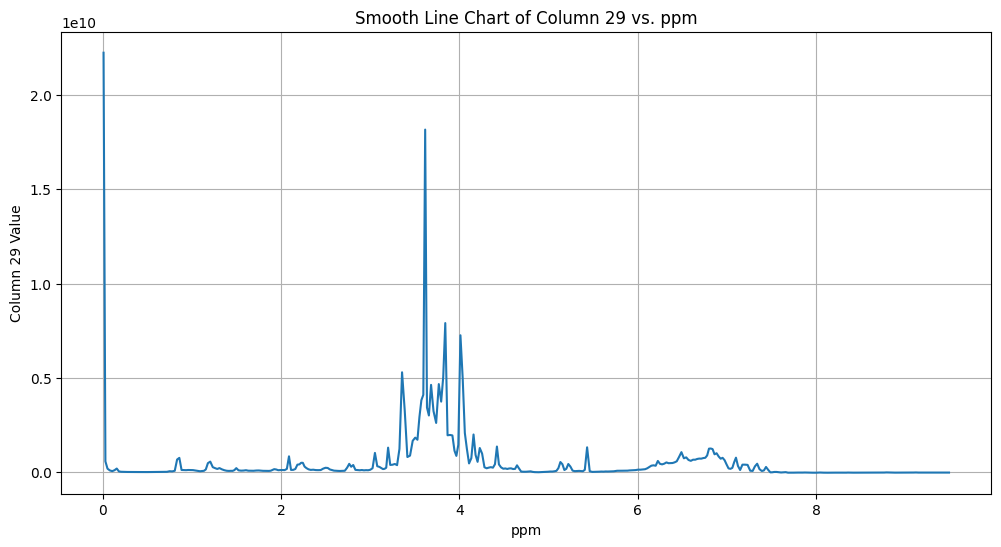

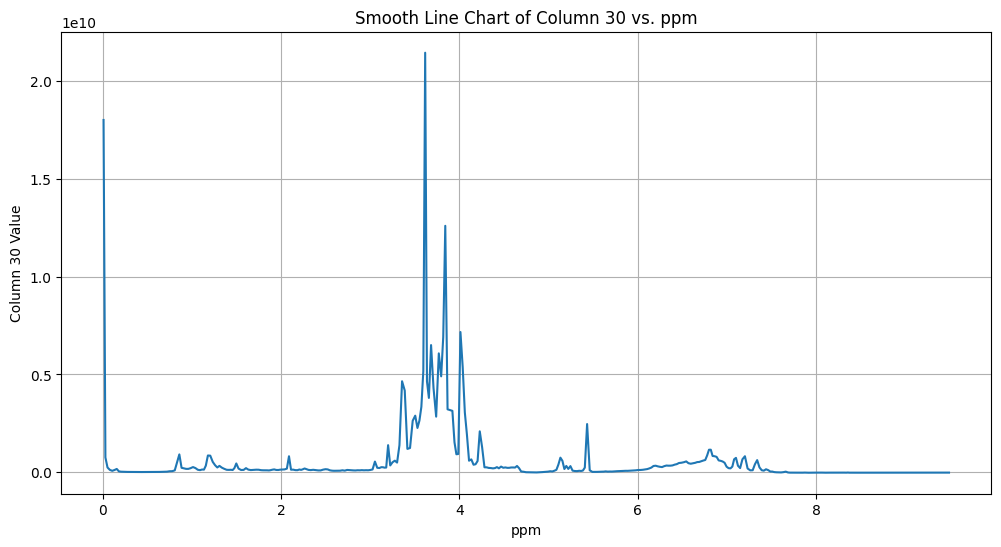

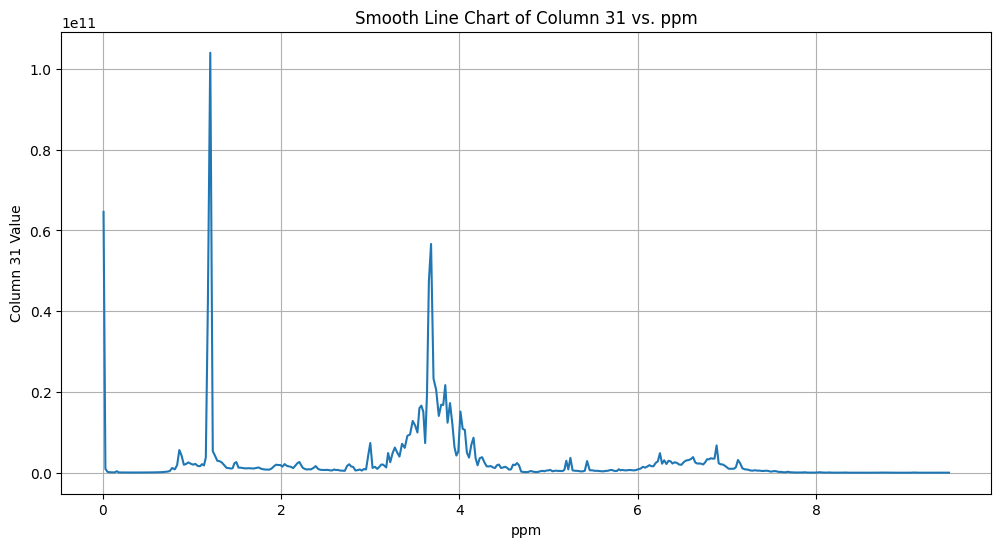

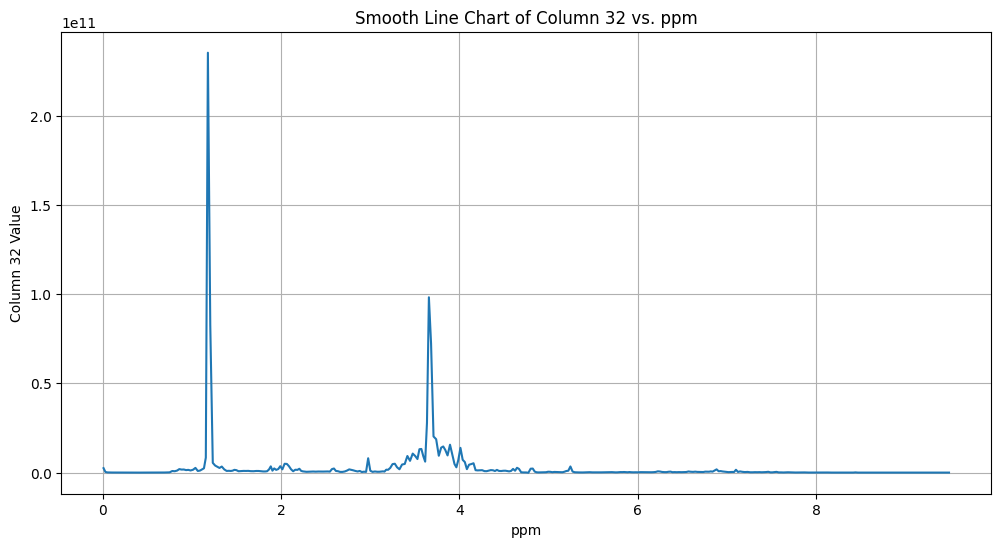

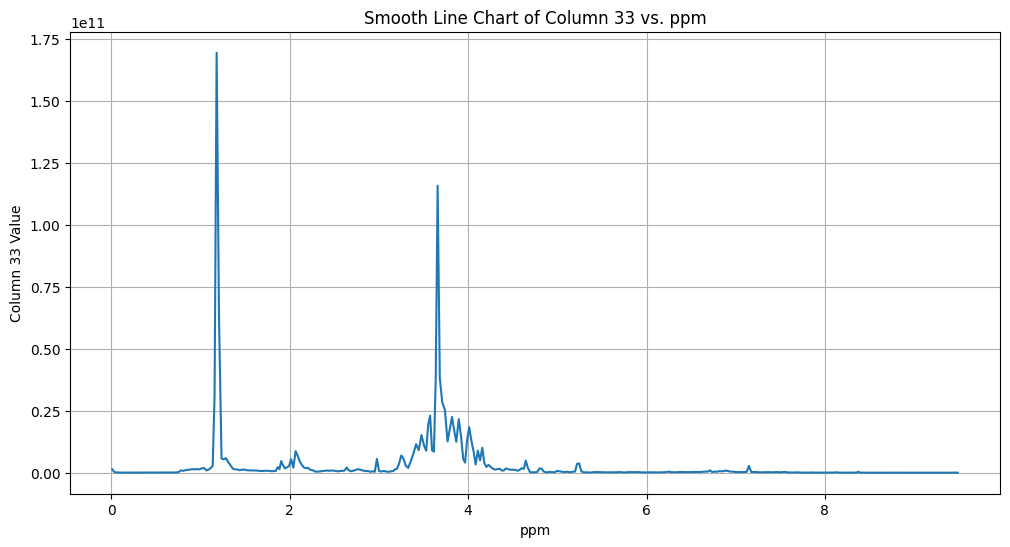

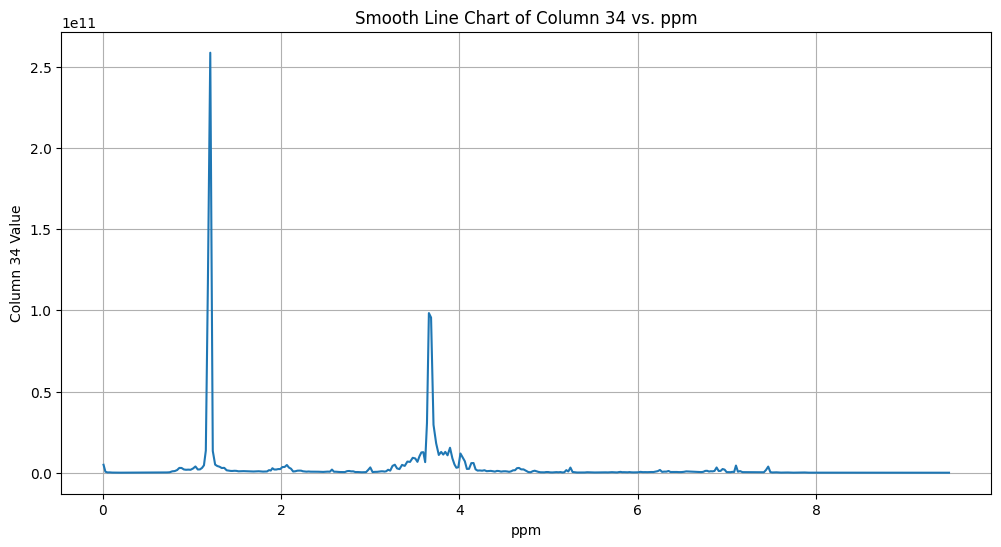

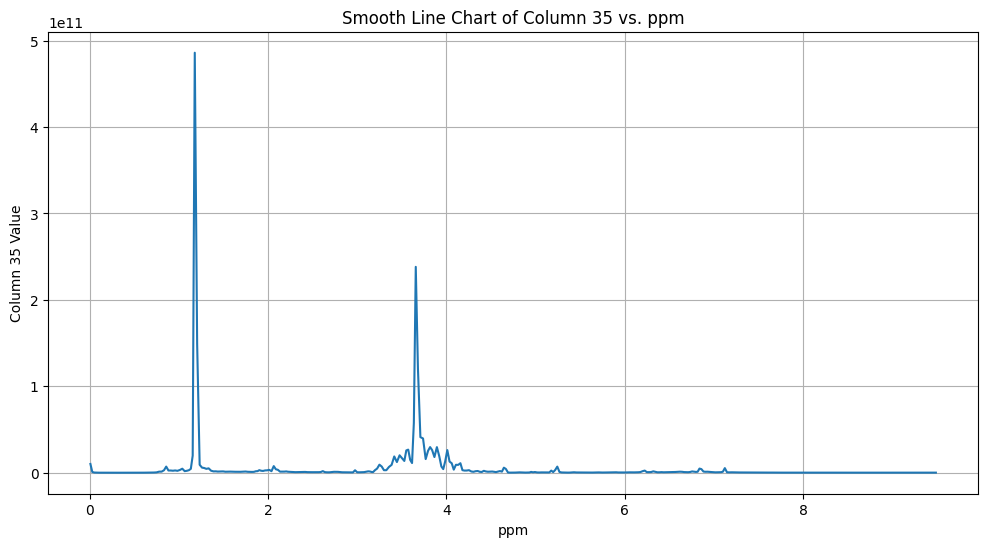

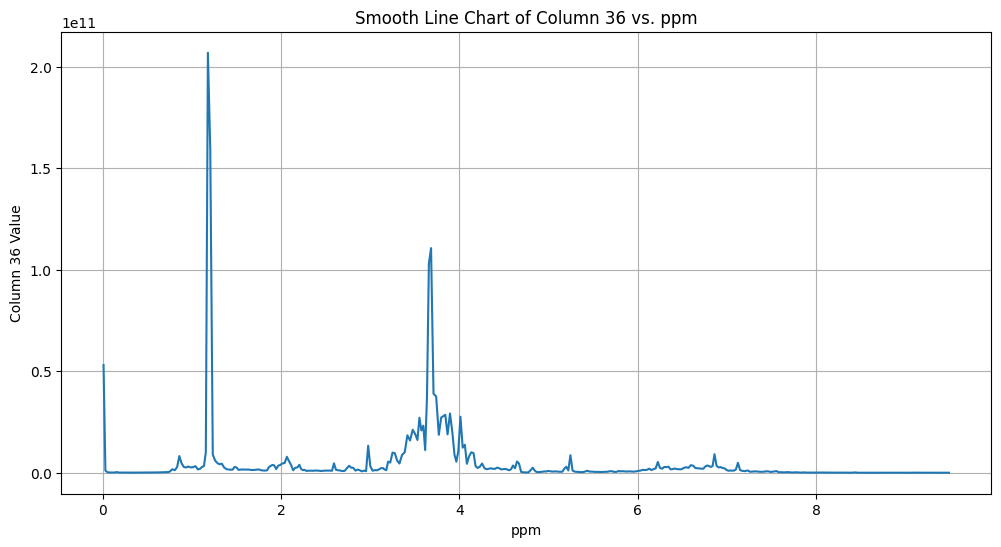

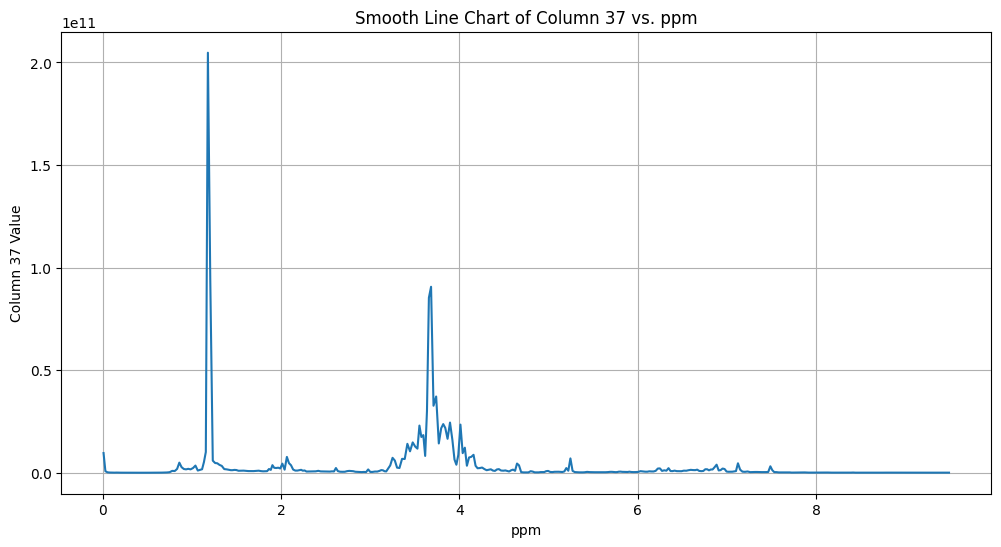

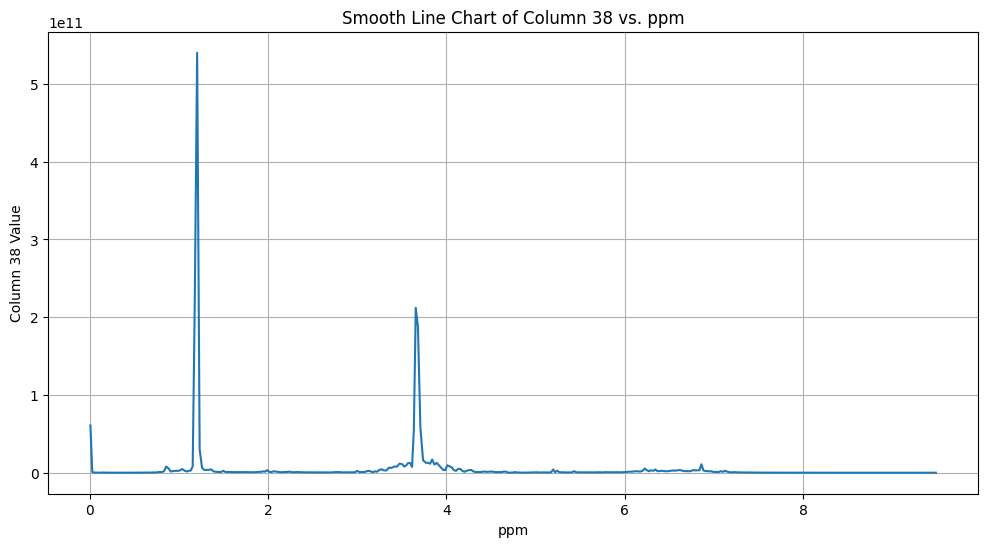

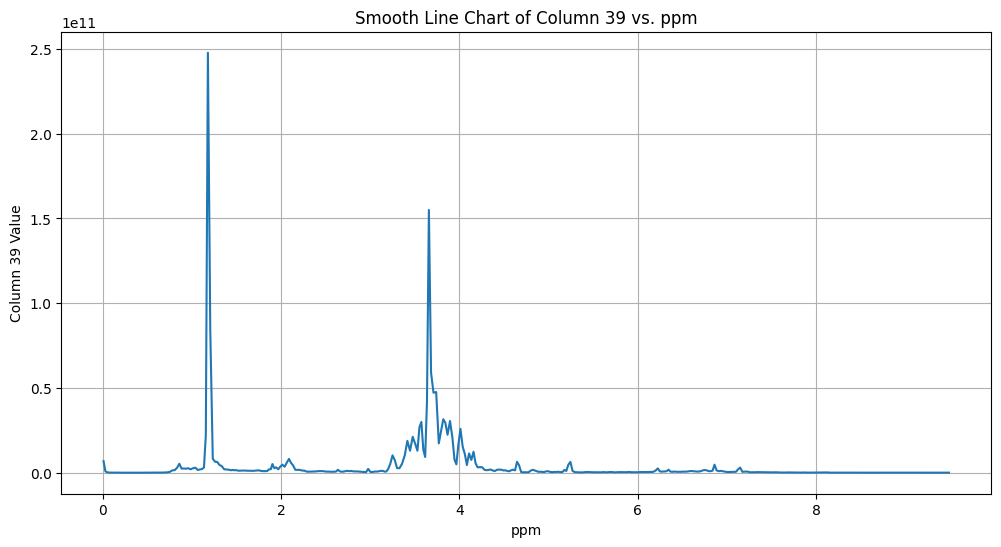

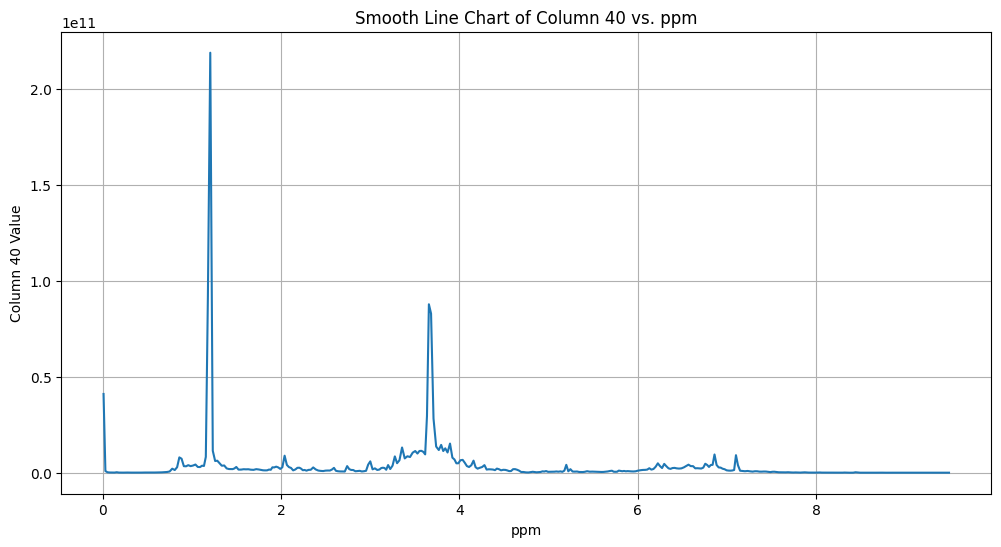

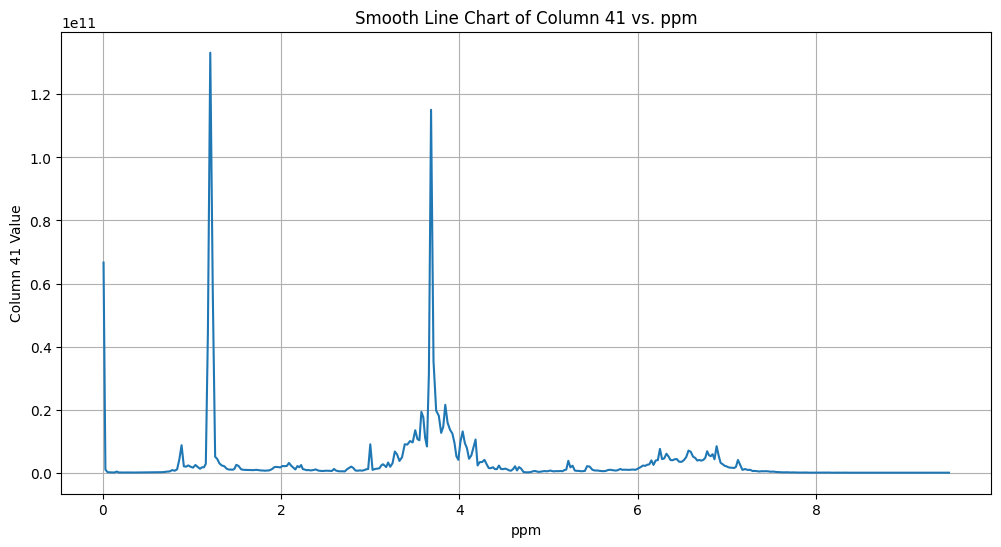

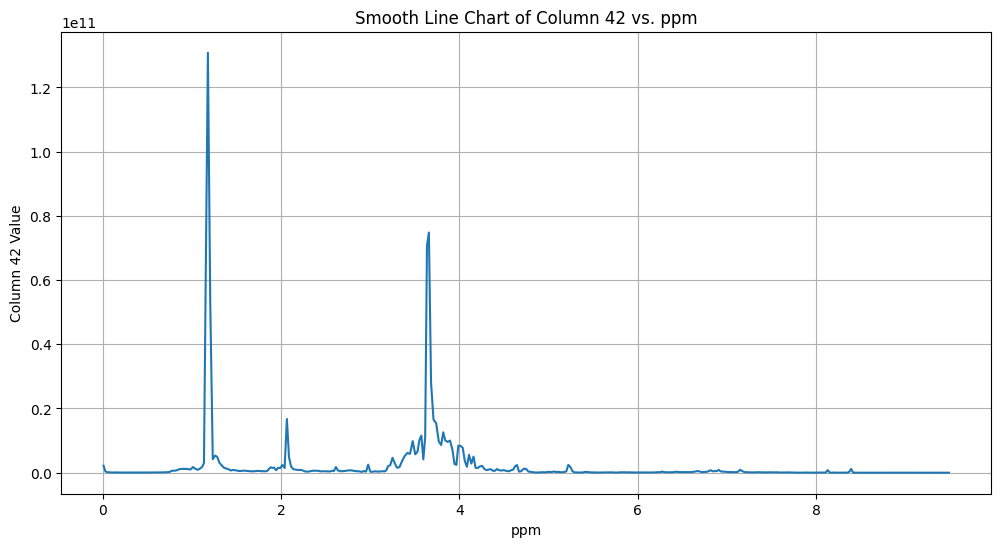

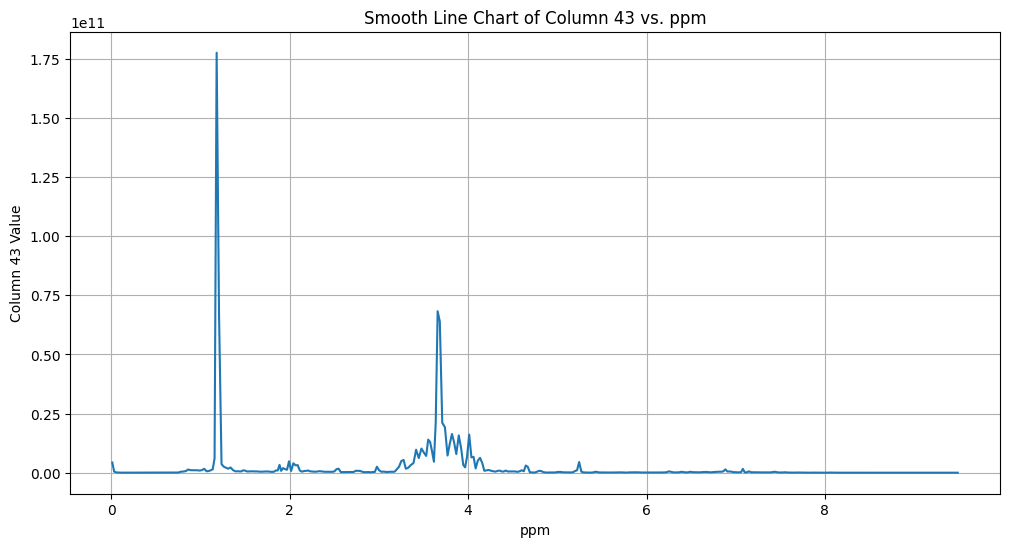

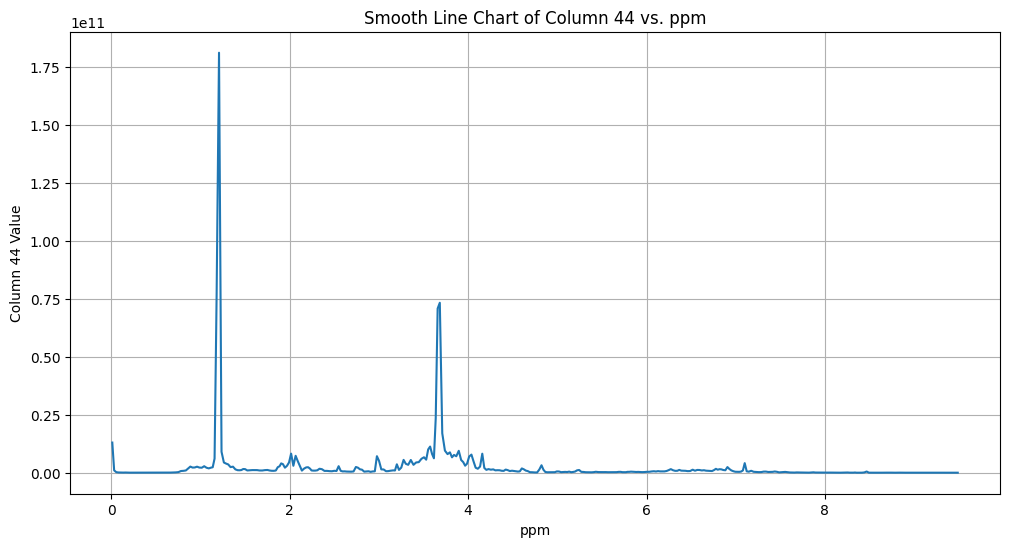

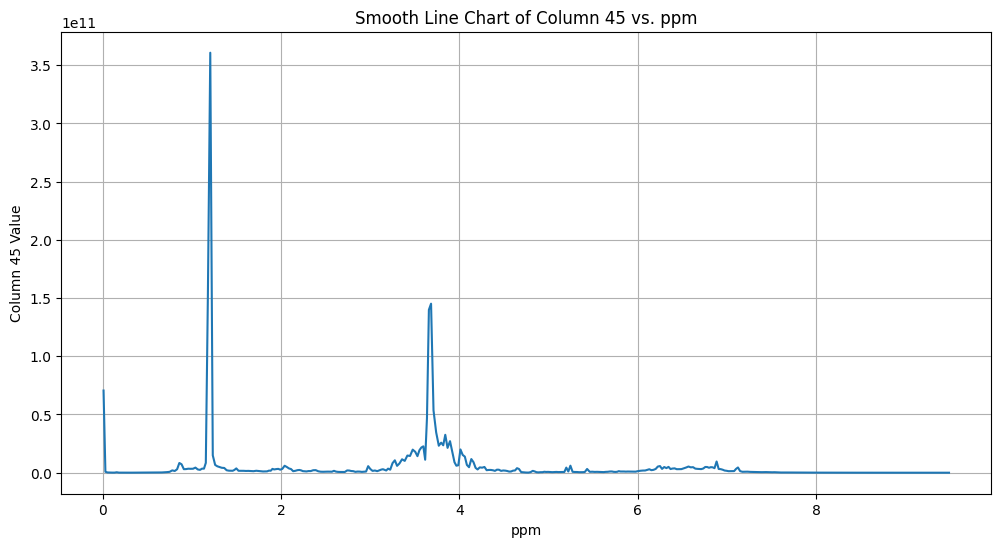

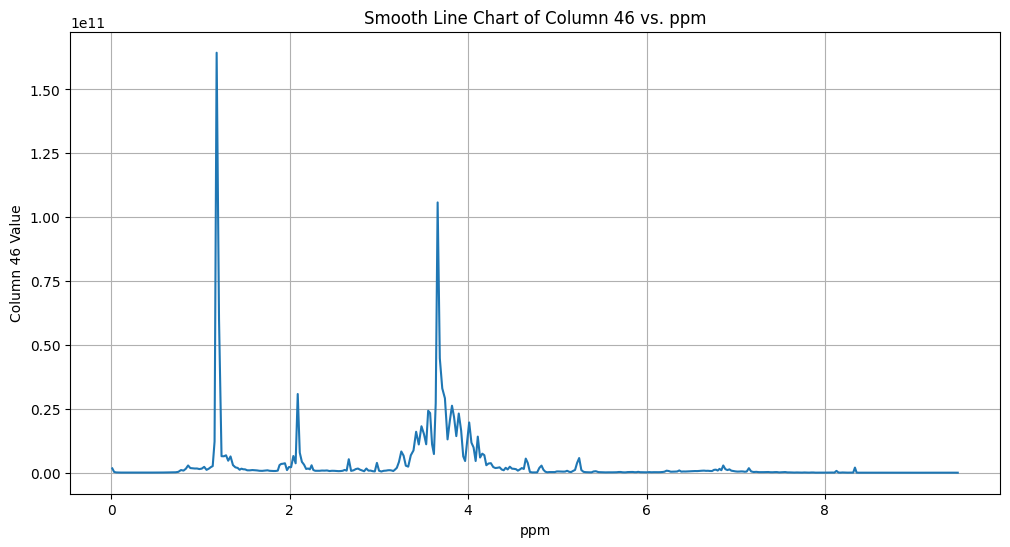

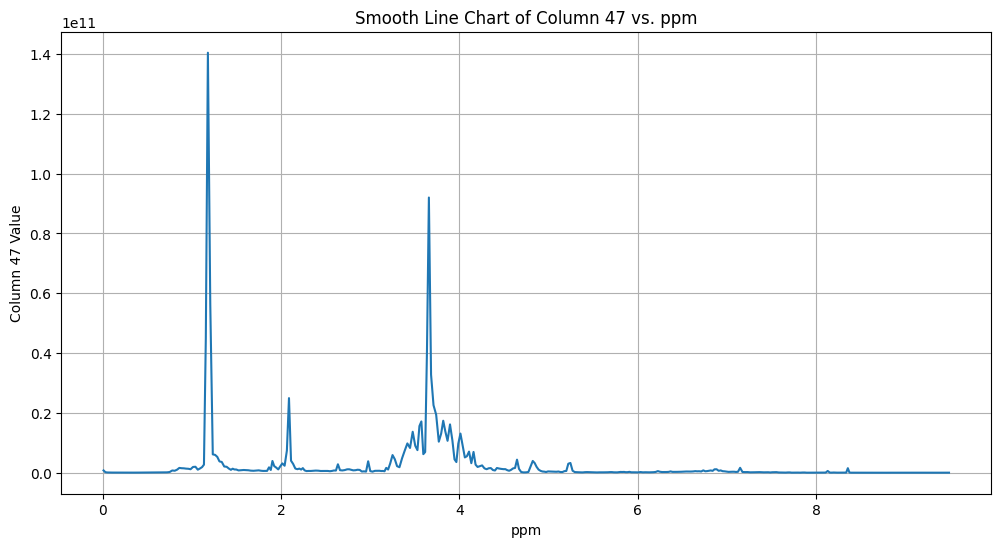

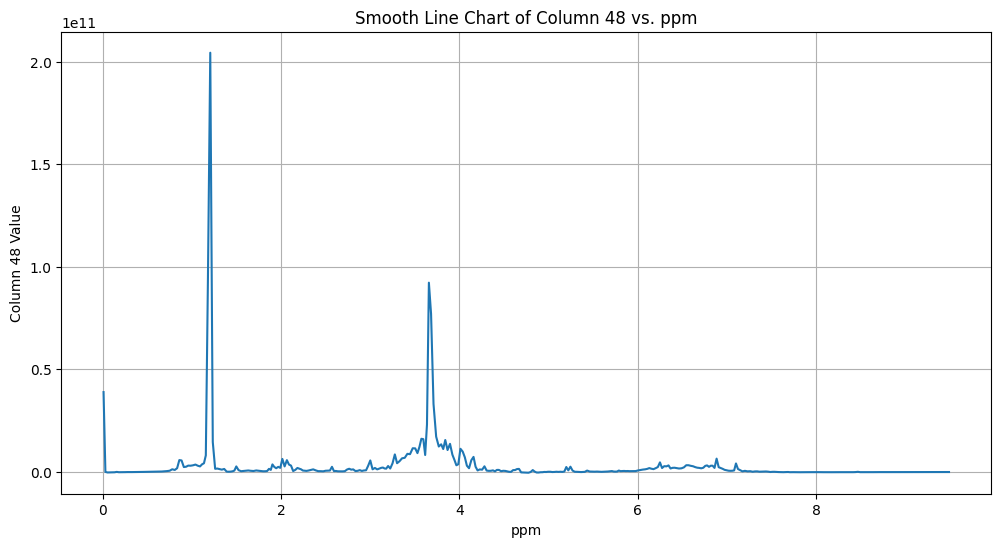

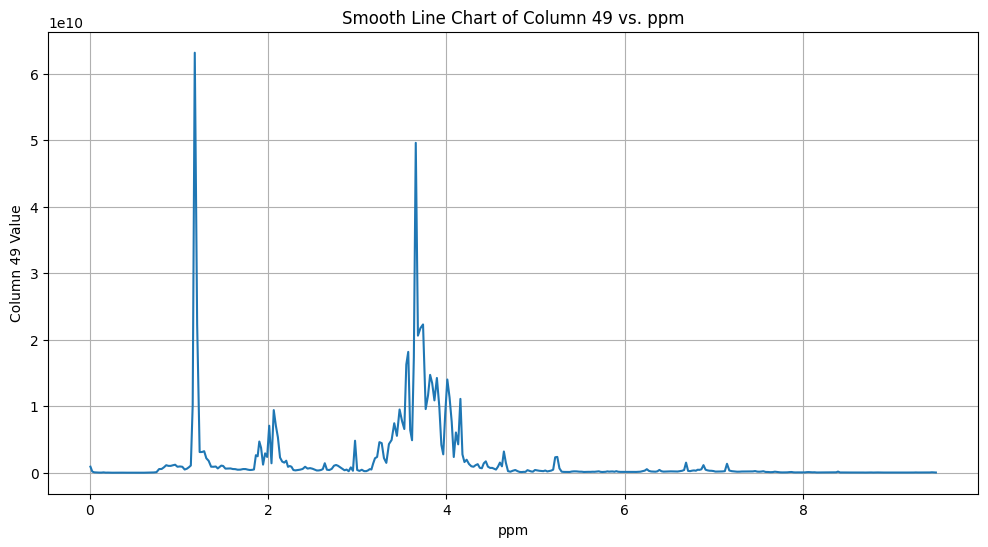

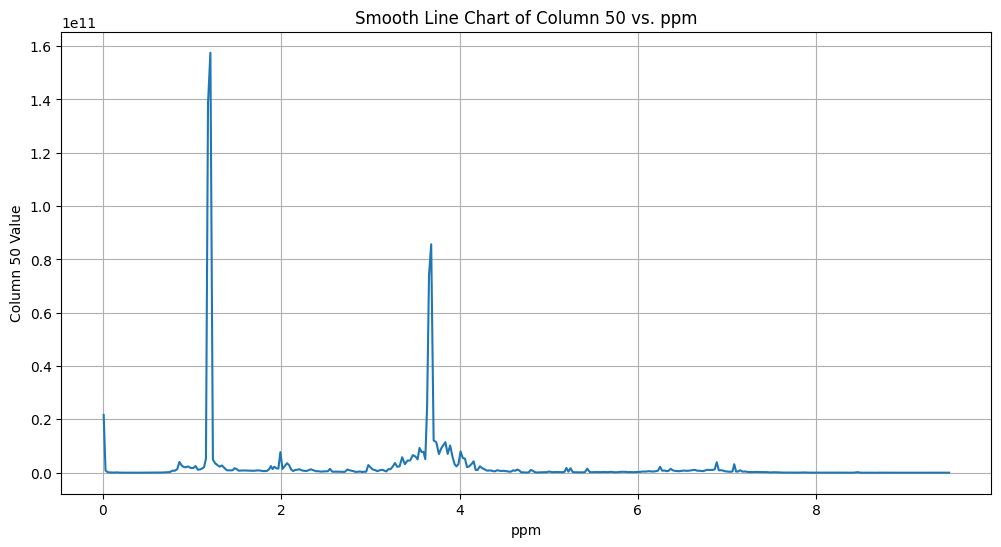

In [157]:
for column in quantized_data.columns:
  if column != 'ppm':
    # Create a smooth line chart
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='ppm', y=column, data=quantized_data)

    # Customize the chart
    plt.xlabel('ppm')
    plt.ylabel(f'Column {column} Value')
    plt.title(f'Smooth Line Chart of Column {column} vs. ppm')
    plt.grid(True)

    plt.show()

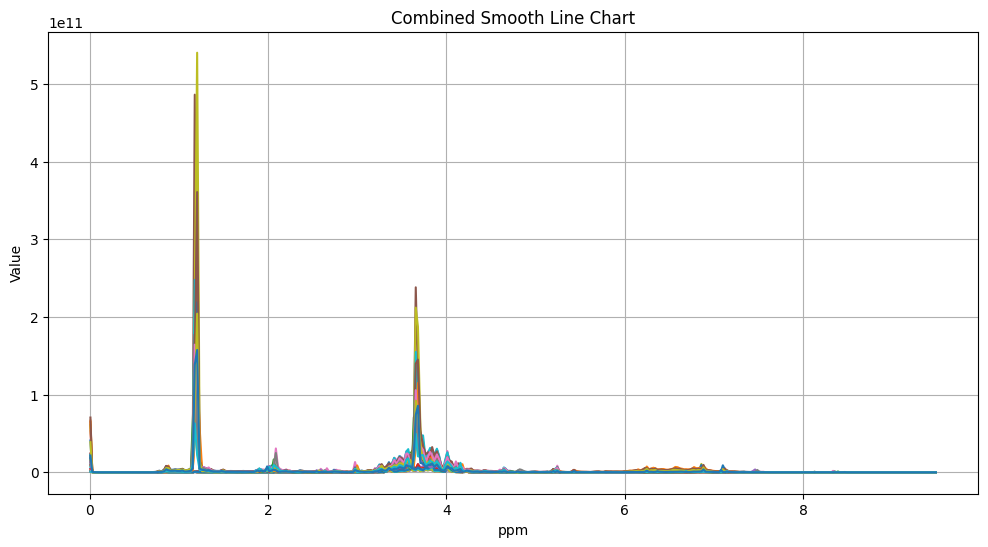

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

for column in quantized_data.columns:
  if column != 'ppm':
    sns.lineplot(x='ppm', y=column, data=quantized_data, legend=False)

plt.xlabel('ppm')
plt.ylabel('Value')
plt.title('Combined Smooth Line Chart')
plt.grid(True)
plt.show()

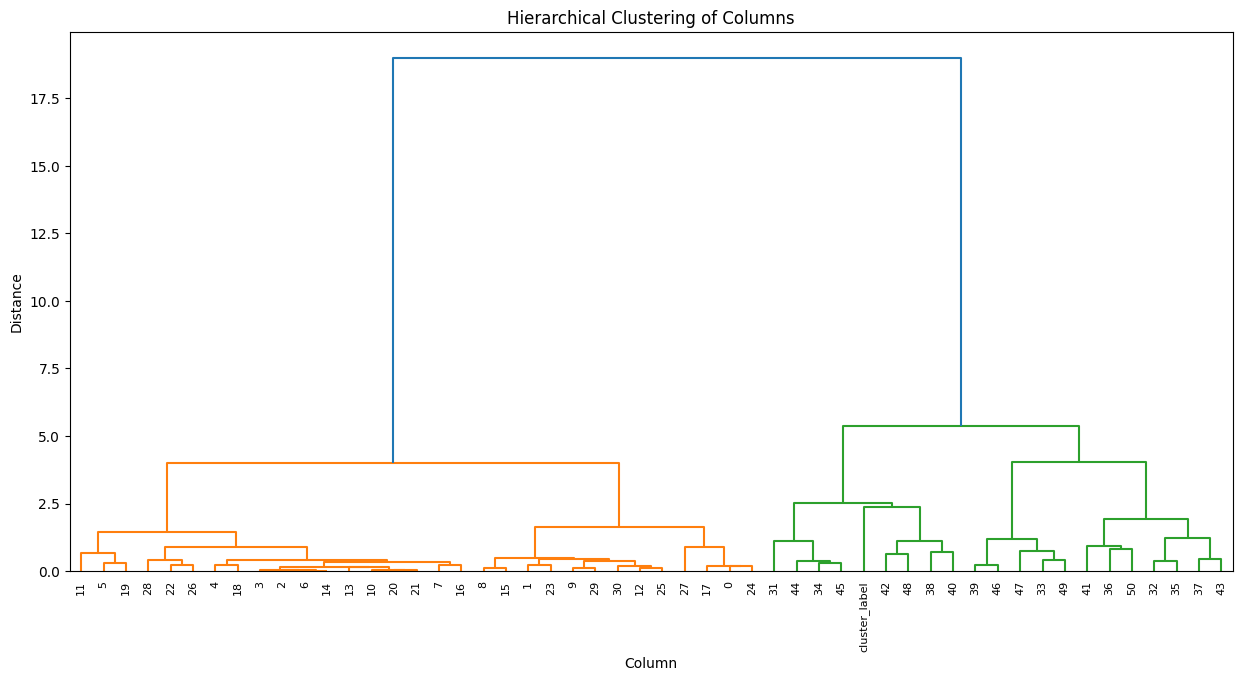

Cluster 1:
  - 5
  - 11
  - 19
Cluster 2:
  - 22
  - 26
  - 28
Cluster 3:
  - 2
  - 3
  - 4
  - 6
  - 7
  - 10
  - 13
  - 14
  - 16
  - 18
  - 20
  - 21
Cluster 4:
  - 1
  - 8
  - 9
  - 12
  - 15
  - 23
  - 25
  - 29
  - 30
Cluster 5:
  - 0
  - 17
  - 24
Cluster 6:
  - 27
Cluster 7:
  - 34
  - 44
  - 45
Cluster 8:
  - 31
Cluster 9:
  - 42
  - 48
Cluster 10:
  - 38
  - 40
Cluster 11:
  - cluster_label
Cluster 12:
  - 39
  - 46
Cluster 13:
  - 33
  - 47
  - 49
Cluster 14:
  - 36
Cluster 15:
  - 50
Cluster 16:
  - 41
Cluster 17:
  - 32
  - 35
Cluster 18:
  - 37
  - 43


In [173]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(df_filtered.drop('ppm', axis=1).transpose())

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(similarity_matrix, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(mergings,
           labels=df_filtered.drop('ppm', axis=1).columns,
           leaf_rotation=90,
           leaf_font_size=8)
plt.title('Hierarchical Clustering of Columns')
plt.xlabel('Column')
plt.ylabel('Distance')
plt.show()

from scipy.cluster.hierarchy import fcluster

threshold = 0.8
cluster_labels = fcluster(mergings, threshold, criterion='distance')


column_clusters = {}
for i, label in enumerate(cluster_labels):
  column_clusters[df_filtered.drop('ppm', axis=1).columns[i]] = label

for cluster_id in set(cluster_labels):
  print(f"Cluster {cluster_id}:")
  for column, cluster in column_clusters.items():
    if cluster == cluster_id:
      print(f"  - {column}")
